In [41]:
# Objective, Can you correctly classify the medical specialties based on the transcription text
#Let us import all the necessary libraries
import os
import numpy as np  
import pandas as pd 
import tim
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import re, string
from sklearn.model_selection import RandomizedSearchCV
from nltk import word_tokenize, sent_tokenize

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


import warnings
warnings.filterwarnings("ignore")


In [42]:
! pip install nltk
import nltk
from nltk.corpus import stopwords

# Download the stopwords dataset if not already downloaded
nltk.download('stopwords')

# Use the stopwords
stop_words = set(stopwords.words('english'))

#EDA
data = pd.read_csv('/kaggle/input/medicaltranscriptions/mtsamples.csv')
print(data.columns)
#data.head(5)

data.drop('Unnamed: 0',axis=1,inplace=True)

data.columns

# a function to preprocess the data
def Preprocessing(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'\([^)]*\)', '', text)
    text = re.sub('"','', text) 
    text = re.sub(r"'s\b","",text)
    text = re.sub("[^a-zA-Z]", " ", text) 
    tokens = [w for w in text.split() if not w in stop_words]
    long_words = [i for i in tokens if len(i)>=3]
    return (" ".join(long_words)).strip()

data['cleaned_transcription'] = data['transcription'].apply(Preprocessing)

print(data.columns)

# creating feature vectors and target vector
transcripts = data.cleaned_transcription.values
Y = data.medical_specialty.values

# label encode our categorical target variable
le = LabelEncoder()
Y = le.fit_transform(Y)

print(Y)

# function to create document-term matrix
def create_vec(strings):
  #tf = TfidfVectorizer(analyzer="char_wb", ngram_range=(1,3))
  tf = TfidfVectorizer(max_features = 6000, ngram_range=(1,3), min_df=5, max_df=0.9)
  tf.fit(strings)
  X = tf.fit_transform(strings)
  return X
vecs = create_vec(transcripts)# a function to preprocess the data

print(vecs)

df = pd.DataFrame({"class":list(y_res)})
df.head()

df['class'].value_counts()

# Splitting data into train:test by 80:20
x_train, x_val, y_train, y_val = train_test_split(x_res, y_res, test_size=0.2, random_state = 42)

# applying SMOTE oversampling method to upsample minority class labels
sm = SMOTE()
x_res, y_res = sm.fit_resample(vecs,Y)

x_train = x_train.toarray()
print('\nTraining features shape: ',x_train.shape)

x_val =x_val.toarray()
print('Test features shape:     ',x_val.shape)

# a function to train and evaluate model
def train_model(model, x_train,x_test,y_train,y_test):
  model.fit(x_train,y_train)
  prediction = model.predict(x_test)
  print('Accuracy',round(accuracy_score(prediction, y_test)*100, 0),'%')
  return model

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Index(['Unnamed: 0', 'description', 'medical_specialty', 'sample_name',
       'transcription', 'keywords'],
      dtype='object')
Index(['description', 'medical_specialty', 'sample_name', 'transcription',
       'keywords', 'cleaned_transcription'],
      dtype='object')
[0 2 2 ... 0 0 0]
  (0, 3314)	0.09403042310250295
  (0, 908)	0.10238291501134683
  (0, 4064)	0.10735828324847223
  (0, 3528)	0.091052388350128
  (0, 5987)	0.07621250555094665
  (0, 5176)	0.1047122232206365
  (0, 5408)	0.10566288771279468
  (0, 149)	0.11042100614514046
  (0, 2991)	0.06482340517448347
  (0, 5920)	0.10599037032882767
  (0, 5229)	0.09315652072007759
  (0, 3313)	0.06423350875032413
  (0, 907)	0.09820037674998712
  (0, 5455)	0.1047122232206365
  (0, 3296)	0.10440537031218039
  (0, 573)	0.05168030582444491
  (0, 4063)	0.10735828324847223
  (0, 5861)	0.0747634135990948
  (0, 151)	0.07360

### ROC Debug

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters from RandomizedSearchCV: {'tol': 1e-05, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'max_iter': 500, 'fit_intercept': False, 'class_weight': 'balanced', 'C': 1}
Best cross-validation score: 0.8198379419764279
Cross-validation results:  {'fit_time': array([55.99555731, 56.78144288]), 'score_time': array([0.2935071 , 0.29338813]), 'test_score': array([0.81975295, 0.81992294])}
Classification report for Logistic Regression: 
                                 precision    recall  f1-score   support

          Allergy / Immunology     0.8826    1.0000    0.9376       233
                       Autopsy     1.0000    1.0000    1.0000       224
                    Bariatrics     0.9492    0.9614    0.9552       233
    Cardiovascular / Pulmonary     0.5849    0.6078    0.5962       204
                  Chiropractic     0.8132    0.9858    0.8913       212
    Consult - History and Phy.     0.3158    

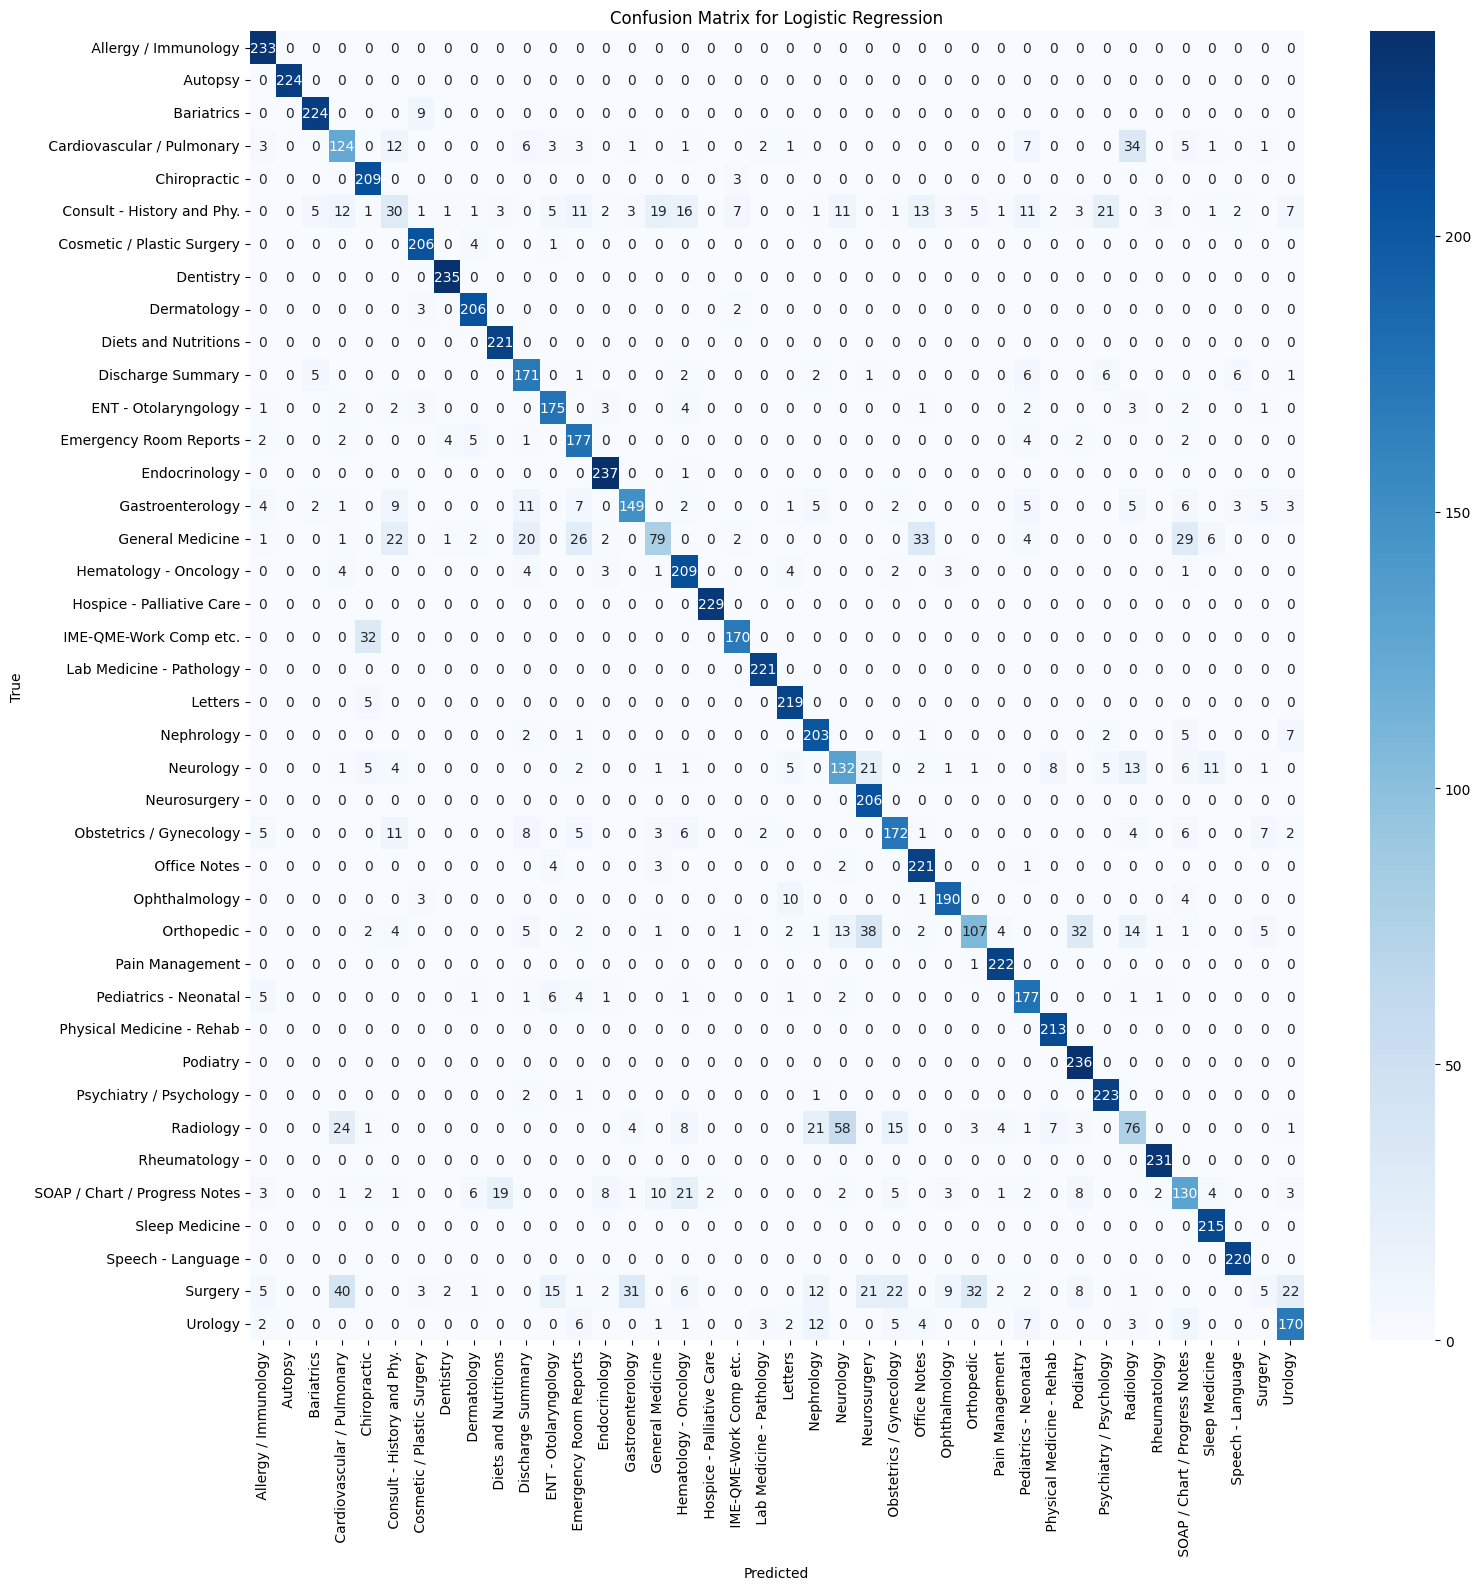

True Positives (TP): 224
True Negatives (TN): 233
False Positives (FP): 0
False Negatives (FN): 0
True Positive Rate (TPR): 1.0
False Positive Rate (FPR): 0.0


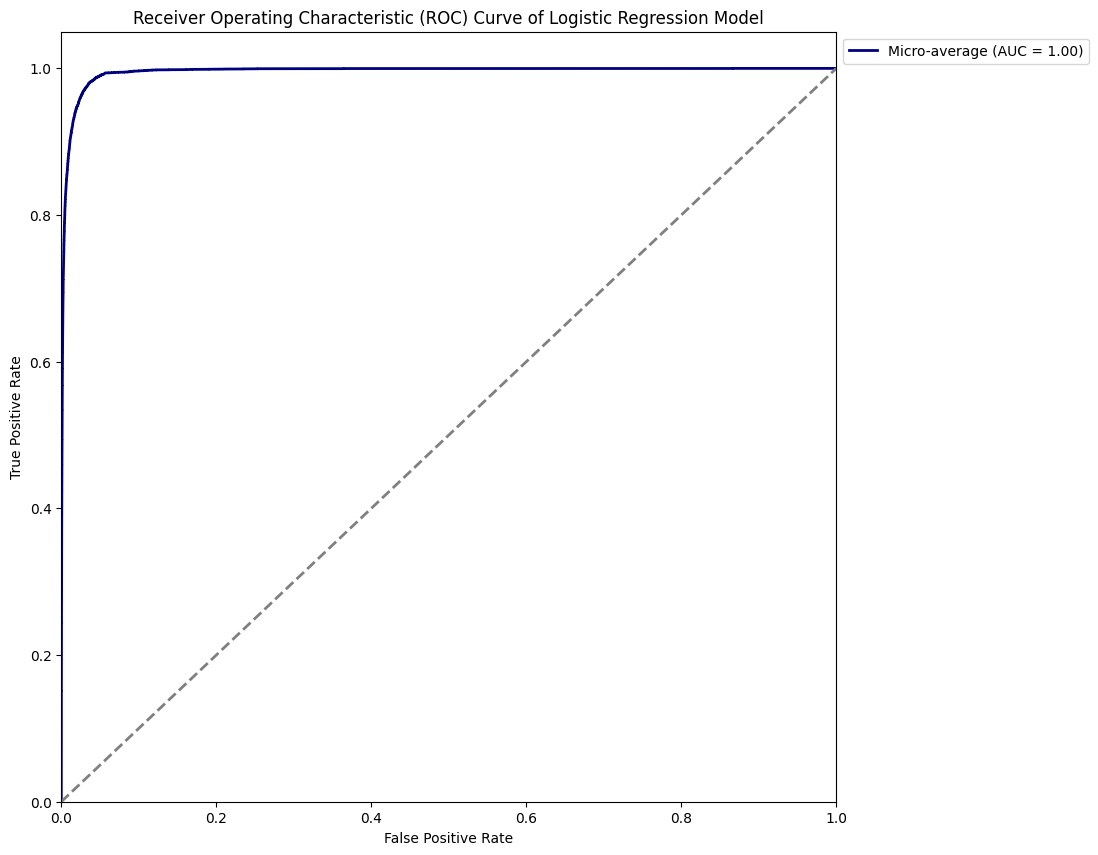

Micro-average AUC: 1.00


In [34]:
# LR
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression

# Logistic Regression classification model
classifier = LogisticRegression()

# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Solver to use for optimization
    'max_iter': [100, 250, 500, 1000],  # Maximum number of iterations for the solvers
    'penalty': ['l2', 'l1', 'elasticnet'],  # Regularization penalty
    'multi_class': ['auto', 'ovr', 'multinomial'],  # Multi-class strategy
    'fit_intercept': [True, False],  # Whether to include the intercept term
    'class_weight': [None, 'balanced'],  # Weigh classes differently in imbalanced datasets
    'tol': [1e-5, 1e-3],  # Tolerance for stopping criteria
}

# Set up RandomizedSearchCV for hyperparameter tuning with cross-validation
random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_dist, 
                                   n_iter=10, cv=2, n_jobs=-1, verbose=1, scoring='accuracy', random_state=42)

# Train the model with RandomizedSearchCV
random_search.fit(x_train, y_train)

# Print the best parameters and the best score found by RandomizedSearchCV
print(f"Best parameters from RandomizedSearchCV: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")

# Use the best estimator found by RandomizedSearchCV
best_classifier = random_search.best_estimator_

# Cross-validation results with the best model (2-fold cross-validation)
cv_results = cross_validate(best_classifier, x_train, y_train, cv=2)

# Print cross-validation results (accuracy, fit time, score time)
print("Cross-validation results: ", cv_results)

# Logistic Regression classification report using the best model
prediction = best_classifier.predict(x_val)

# Print classification report (with the correct order for y_true and y_pred)
print('Classification report for Logistic Regression: \n', classification_report(y_val, prediction, target_names=list(le.classes_), digits=4))

# Confusion Matrix Logistic Regression
conf_matrix = confusion_matrix(y_val, prediction)

# Plotting the confusion matrix
plt.figure(figsize=(17, 17))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Compute TP, TN, FP, FN for a binary classification example (choose one class)
TP = conf_matrix[1, 1]  # True Positive
TN = conf_matrix[0, 0]  # True Negative
FP = conf_matrix[0, 1]  # False Positive
FN = conf_matrix[1, 0]  # False Negative

# Print TP, TN, FP, FN
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
TPR = TP / (TP + FN)  # Sensitivity, Recall
FPR = FP / (FP + TN)  # 1 - Specificity

# Print TPR and FPR
print(f"True Positive Rate (TPR): {TPR}")
print(f"False Positive Rate (FPR): {FPR}")

# Binarize the true labels for multi-class ROC calculation
y_val_bin = label_binarize(y_val, classes=np.unique(y_val))  # Binarize true labels
y_score = best_classifier.predict_proba(x_val)  # Predicted probabilities

# Compute micro-average ROC curve and AUC
fpr, tpr, _ = roc_curve(y_val_bin.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

# Plot the ROC curve for micro-average
plt.figure(figsize=(10, 10))

# Plot micro-average ROC curve
plt.plot(fpr, tpr, color='navy', lw=2, linestyle='-', label=f'Micro-average (AUC = {roc_auc:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Logistic Regression Model') 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Print micro-average AUC
print(f'Micro-average AUC: {roc_auc:.2f}') 

In [35]:
from pycm import ConfusionMatrix
cm = ConfusionMatrix(actual_vector=y_val,predict_vector=prediction) 
print(cm)

Predict   0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        
Actual
0         233       0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         

1         0         224       0         0         0         0         0         0         0         0         0         0         0         0         0         0         

In [ ]:
cm.classes

In [ ]:
cm.print_matrix()

In [ ]:
cm.print_normalized_matrix()

In [ ]:
cm.stat(summary=True)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters from RandomizedSearchCV: {'estimator__tol': 1e-05, 'estimator__solver': 'liblinear', 'estimator__penalty': 'l2', 'estimator__multi_class': 'ovr', 'estimator__max_iter': 500, 'estimator__fit_intercept': False, 'estimator__class_weight': 'balanced', 'estimator__C': 1}
Best cross-validation score: 0.8260142792384406
Cross-validation results:  {'fit_time': array([86.03123999, 85.58115363]), 'score_time': array([5.42264271, 5.36697578]), 'test_score': array([0.82762919, 0.82439937])}
Classification report for Logistic Regression: 
                                 precision    recall  f1-score   support

          Allergy / Immunology     0.9708    1.0000    0.9852       233
                       Autopsy     1.0000    1.0000    1.0000       224
                    Bariatrics     0.9429    0.9914    0.9665       233
    Cardiovascular / Pulmonary     0.6190    0.6373    0.6280       204
                  Chiropracti

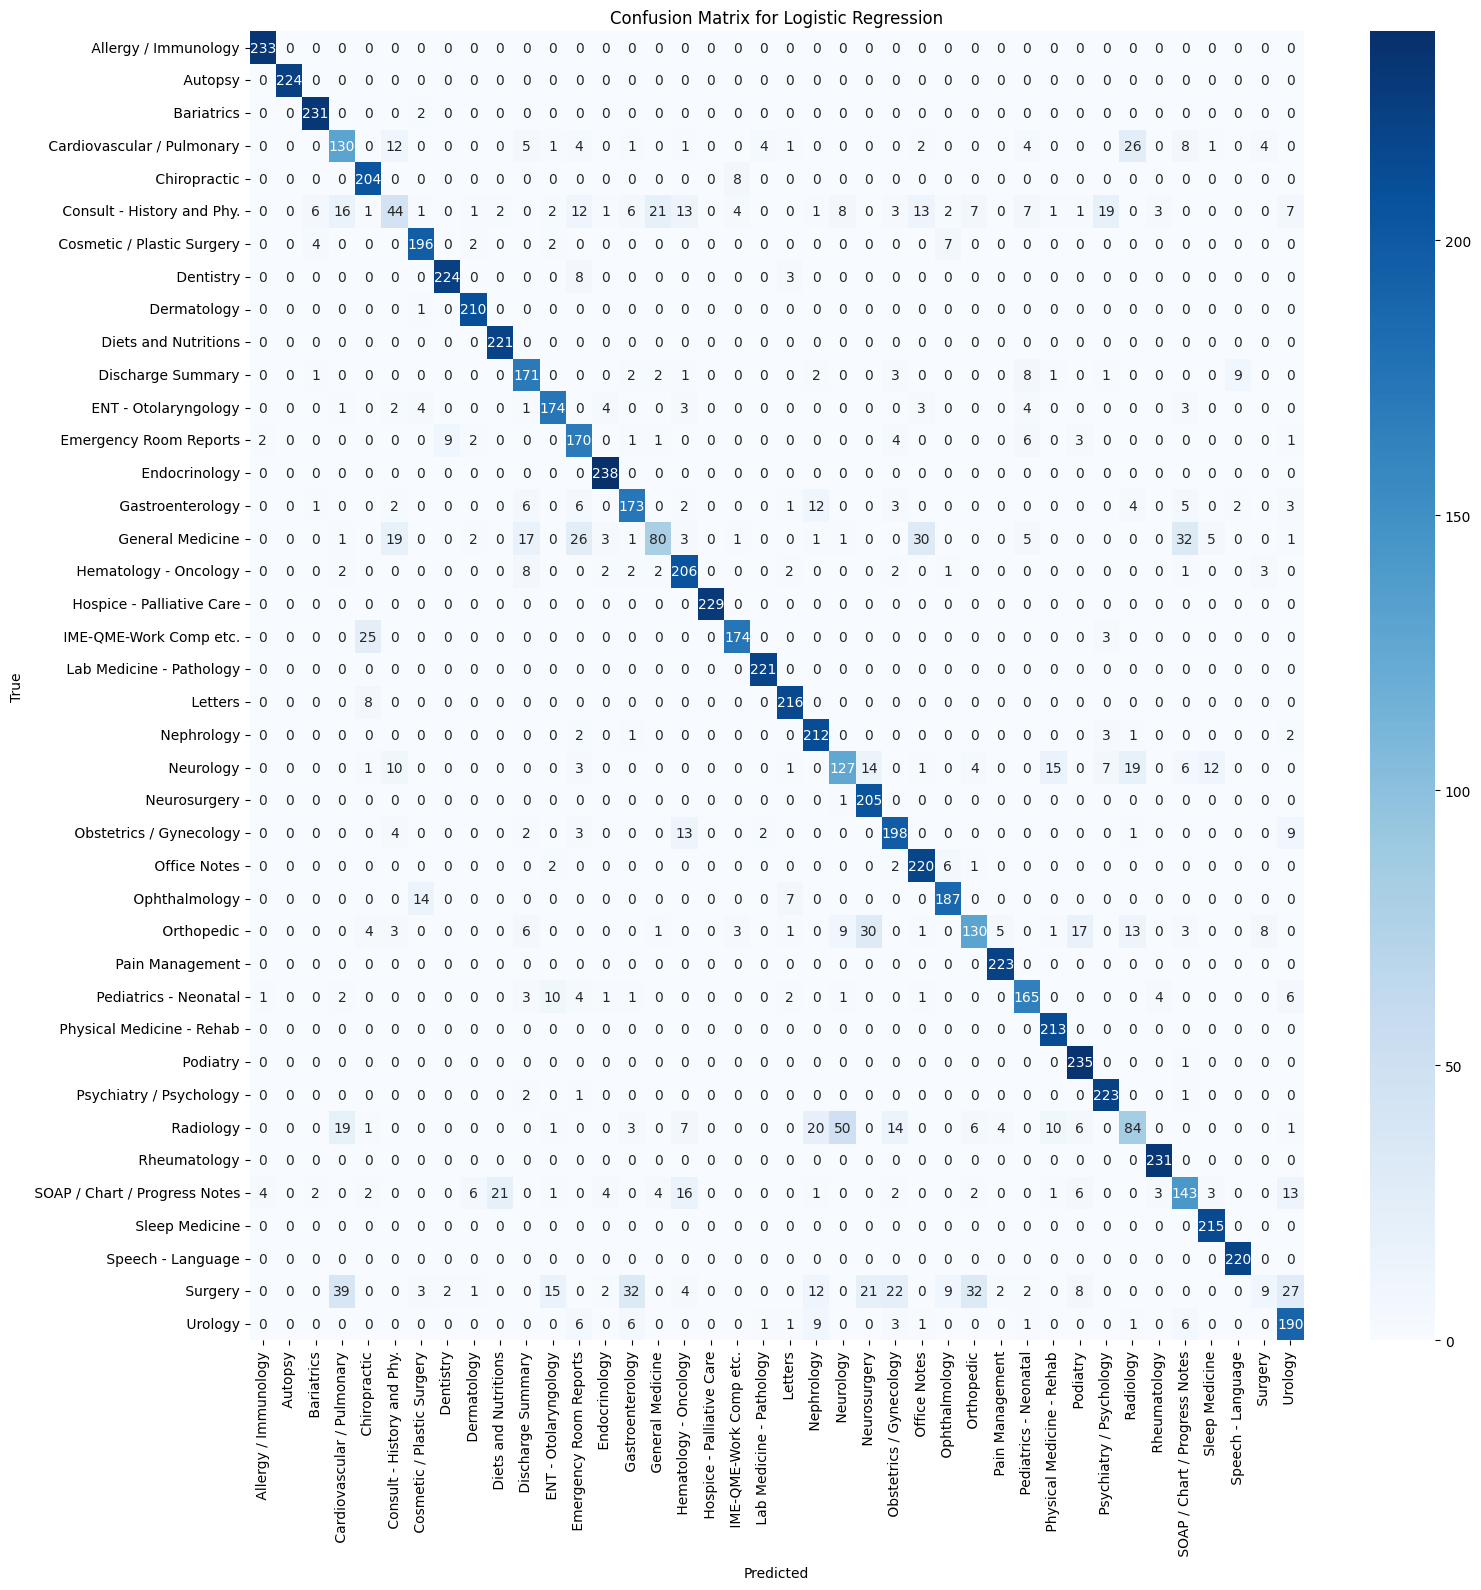

True Positives (TP): 224
True Negatives (TN): 233
False Positives (FP): 0
False Negatives (FN): 0
True Positive Rate (TPR): 1.0
False Positive Rate (FPR): 0.0


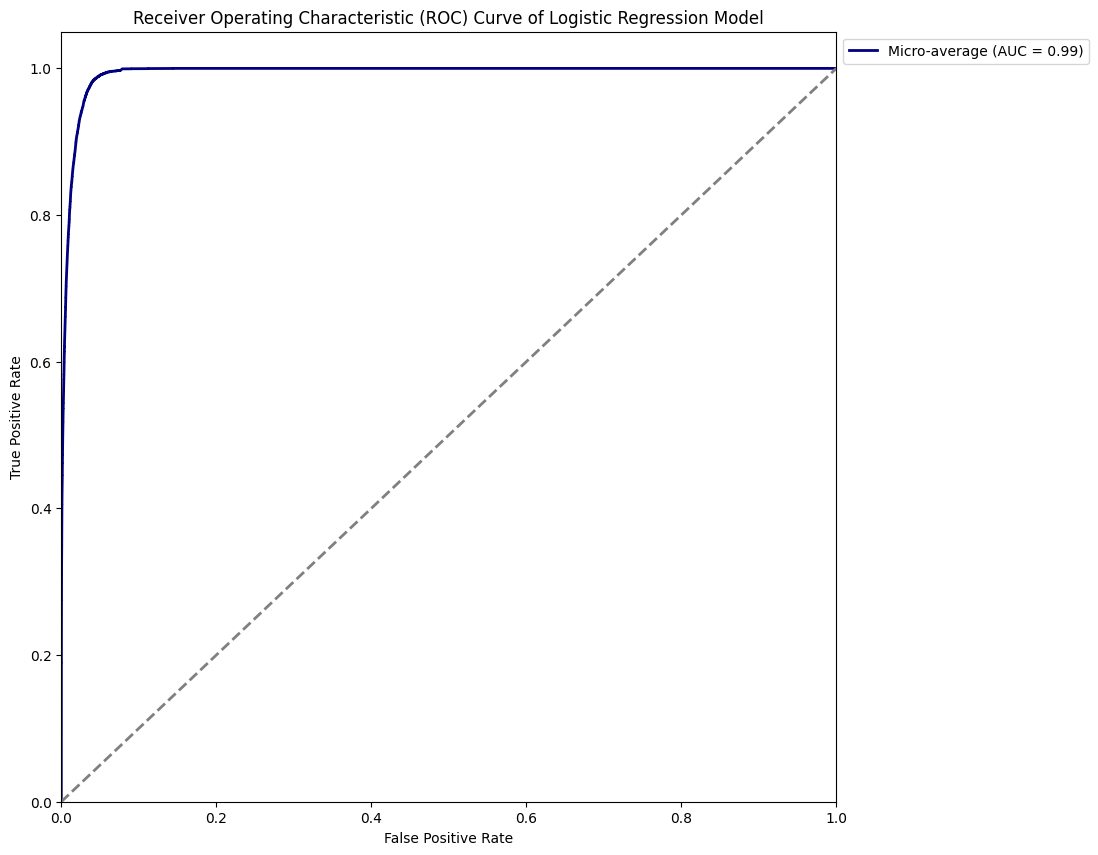

Micro-average AUC: 0.99


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Logistic Regression classification model wrapped with OneVsRestClassifier
classifier = OneVsRestClassifier(LogisticRegression())

# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'estimator__C': [0.1, 1, 10],  # Regularization strength
    'estimator__solver': ['liblinear', 'lbfgs', 'saga'],  # Solver to use for optimization
    'estimator__max_iter': [100, 250, 500, 1000],  # Maximum number of iterations for the solvers
    'estimator__penalty': ['l2', 'l1', 'elasticnet'],  # Regularization penalty
    'estimator__multi_class': ['auto', 'ovr', 'multinomial'],  # Multi-class strategy
    'estimator__fit_intercept': [True, False],  # Whether to include the intercept term
    'estimator__class_weight': [None, 'balanced'],  # Weigh classes differently in imbalanced datasets
    'estimator__tol': [1e-5, 1e-3],  # Tolerance for stopping criteria
}

# Set up RandomizedSearchCV for hyperparameter tuning with cross-validation
random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_dist, 
                                   n_iter=10, cv=2, n_jobs=-1, verbose=1, scoring='accuracy', random_state=42)

# Train the model with RandomizedSearchCV
random_search.fit(x_train, y_train)

# Print the best parameters and the best score found by RandomizedSearchCV
print(f"Best parameters from RandomizedSearchCV: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")

# Use the best estimator found by RandomizedSearchCV
best_classifier = random_search.best_estimator_

# Cross-validation results with the best model (2-fold cross-validation)
cv_results = cross_validate(best_classifier, x_train, y_train, cv=2)

# Print cross-validation results (accuracy, fit time, score time)
print("Cross-validation results: ", cv_results)

# Logistic Regression classification report using the best model
prediction = best_classifier.predict(x_val)

# Print classification report (with the correct order for y_true and y_pred)
print('Classification report for Logistic Regression: \n', classification_report(y_val, prediction, target_names=list(le.classes_), digits=4))

# Confusion Matrix Logistic Regression
conf_matrix = confusion_matrix(y_val, prediction)

# Plotting the confusion matrix
plt.figure(figsize=(17, 17))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Compute TP, TN, FP, FN for a binary classification example (choose one class)
TP = conf_matrix[1, 1]  # True Positive
TN = conf_matrix[0, 0]  # True Negative
FP = conf_matrix[0, 1]  # False Positive
FN = conf_matrix[1, 0]  # False Negative

# Print TP, TN, FP, FN
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
TPR = TP / (TP + FN)  # Sensitivity, Recall
FPR = FP / (FP + TN)  # 1 - Specificity

# Print TPR and FPR
print(f"True Positive Rate (TPR): {TPR}")
print(f"False Positive Rate (FPR): {FPR}")

# Binarize the true labels for multi-class ROC calculation
y_val_bin = label_binarize(y_val, classes=np.unique(y_val))  # Binarize true labels
y_score = best_classifier.predict_proba(x_val)  # Predicted probabilities

# Compute micro-average ROC curve and AUC
fpr, tpr, _ = roc_curve(y_val_bin.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

# Plot the ROC curve for micro-average
plt.figure(figsize=(10, 10))

# Plot micro-average ROC curve
plt.plot(fpr, tpr, color='navy', lw=2, linestyle='-', label=f'Micro-average (AUC = {roc_auc:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Logistic Regression Model') 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Print micro-average AUC
print(f'Micro-average AUC: {roc_auc:.2f}')

In [44]:
from pycm import ConfusionMatrix
cm = ConfusionMatrix(actual_vector=y_val,predict_vector=prediction) 
print(cm)

Predict   0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        
Actual
0         233       0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         

1         0         224       0         0         0         0         0         0         0         0         0         0         0         0         0         0         

### Average Token count on medical specialty 

In [2]:
# Importing necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import pprint

In [3]:
# Downloading the stopwords dataset if not already downloaded
nltk.download('stopwords')

# Use the stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Load the data
data = pd.read_csv('/kaggle/input/medicaltranscriptions/mtsamples.csv')

# Drop unnecessary column
data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
# Function to preprocess the text
def Preprocessing(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'\([^)]*\)', '', text)  # Remove text within parentheses
    text = re.sub('"', '', text)  # Remove quotes
    text = re.sub(r"'s\b", "", text)  # Remove possessive 's
    text = re.sub("[^a-zA-Z]", " ", text)  # Remove non-alphabetic characters
    tokens = [w for w in text.split() if not w in stop_words]  # Remove stopwords
    long_words = [i for i in tokens if len(i) >= 3]  # Keep words with length >= 3
    return " ".join(long_words).strip()  # Join words back into a string and remove extra spaces

In [6]:
# Apply preprocessing function to the 'transcription' column
data['cleaned_transcription'] = data['transcription'].apply(Preprocessing)

In [7]:
# Group by 'medical_specialty' and calculate the average token count for 'cleaned_transcription'
avg_tokens_by_specialty = data.groupby('medical_specialty')['cleaned_transcription'].apply(lambda x: x.str.split().apply(len).mean())

In [8]:
# Pretty print the result using pprint
print("Using pprint: Avg.no of tokens on transcription based on medical_specialty:")
pprint.pprint(avg_tokens_by_specialty)

Using pprint: Avg.no of tokens on transcription based on medical_specialty:
medical_specialty
Allergy / Immunology             266.000000
Autopsy                          688.375000
Bariatrics                       227.555556
Cardiovascular / Pulmonary       257.045699
Chiropractic                     509.571429
Consult - History and Phy.       322.932171
Cosmetic / Plastic Surgery       306.037037
Dentistry                        283.222222
Dermatology                      229.965517
Diets and Nutritions             214.400000
Discharge Summary                226.814815
ENT - Otolaryngology             248.244898
Emergency Room Reports           317.826667
Endocrinology                    358.105263
Gastroenterology                 199.086957
General Medicine                 271.884170
Hematology - Oncology            232.211111
Hospice - Palliative Care        370.000000
IME-QME-Work Comp etc.           576.562500
Lab Medicine - Pathology         145.875000
Letters                   

In [9]:
sum_avg_tokens = avg_tokens_by_specialty.sum()
print("\nSum of the average token counts for all specialties:")
print(sum_avg_tokens)


Sum of the average token counts for all specialties:
11205.021220255036


In [10]:
# Specific 4 medical specialties to filter
specialties_of_interest = [ ' Diets and Nutritions', ' Physical Medicine - Rehab', ' Speech - Language' , ' Surgery']

# Check if all specialties in the list are present in the dataset
#missing_specialties = [spec for spec in specialties_of_interest if spec not in avg_tokens_by_specialty.index]
#print("\nMissing specialties (not found in the dataset):")
#print(missing_specialties)

# Filter the average token counts for the selected specialties (handle any missing specialties)
filtered_avg_tokens = avg_tokens_by_specialty[specialties_of_interest]

# Pretty print the filtered result using pprint
print("\Avg.no of tokens on transcription based on 7 medical_specialty:")
pprint.pprint(filtered_avg_tokens)

# Optionally, if you prefer a well-formatted table print using pandas (more readable in large data)
#print("\nUsing pandas pretty print for Specific Specialties:")
#print(filtered_avg_tokens.to_string())

\Avg.no of tokens on transcription based on 7 medical_specialty:
medical_specialty
Diets and Nutritions         214.400000
Physical Medicine - Rehab    271.571429
Speech - Language            235.444444
Surgery                      269.929284
Name: cleaned_transcription, dtype: float64


In [11]:
sum_avg_tokens = filtered_avg_tokens.sum()
print("\nSum of the average token counts for 4 specialties:")
print(sum_avg_tokens)


Sum of the average token counts for 4 specialties:
991.3451567874051


In [12]:
# Specific 36 medical specialties to filter
specialties_of_interest = [' Allergy / Immunology', ' Bariatrics', ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry', ' Urology', ' General Medicine',\
 ' SOAP / Chart / Progress Notes', ' Sleep Medicine', ' Rheumatology', ' Radiology', ' Psychiatry / Psychology', ' Podiatry', ' Pain Management', ' Pediatrics - Neonatal', ' Orthopedic', ' Office Notes', ' Obstetrics / Gynecology',\
 ' Neurosurgery', ' Nephrology', ' Letters', ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.', ' Hospice - Palliative Care', ' Hematology - Oncology', ' Gastroenterology', ' ENT - Otolaryngology',
 ' Endocrinology', ' Emergency Room Reports', ' Discharge Summary', ' Dermatology', ' Cosmetic / Plastic Surgery', ' Chiropractic', ' Autopsy', ' Consult - History and Phy.', ' Ophthalmology', ' Pediatrics - Neonatal'  ]

# Check if all specialties in the list are present in the dataset
#missing_specialties = [spec for spec in specialties_of_interest if spec not in avg_tokens_by_specialty.index]
#print("\nMissing specialties (not found in the dataset):")
#print(missing_specialties)

# Filter the average token counts for the selected specialties (handle any missing specialties)
filtered_avg_tokens = avg_tokens_by_specialty[specialties_of_interest]

# Pretty print the filtered result using pprint
print("\Avg.no of tokens on transcription based on 36 medical_specialty:")
pprint.pprint(filtered_avg_tokens)

# Optionally, if you prefer a well-formatted table print using pandas (more readable in large data)
#print("\nUsing pandas pretty print for Specific Specialties:")
#print(filtered_avg_tokens.to_string())

\Avg.no of tokens on transcription based on 36 medical_specialty:
medical_specialty
Allergy / Immunology             266.000000
Bariatrics                       227.555556
Cardiovascular / Pulmonary       257.045699
Neurology                        283.152466
Dentistry                        283.222222
Urology                          223.879747
General Medicine                 271.884170
SOAP / Chart / Progress Notes    194.819277
Sleep Medicine                   174.850000
Rheumatology                     269.800000
Radiology                        168.794872
Psychiatry / Psychology          427.396226
Podiatry                         273.404255
Pain Management                  133.016129
Pediatrics - Neonatal            262.357143
Orthopedic                       315.292958
Office Notes                     159.039216
Obstetrics / Gynecology          258.481250
Neurosurgery                     313.702128
Nephrology                       246.037037
Letters                          262

In [13]:
sum_avg_tokens = filtered_avg_tokens.sum()
print("\nSum of the average token counts for 36 specialties:")
print(sum_avg_tokens)


Sum of the average token counts for 36 specialties:
10476.033206324773


### Ablation Study

---- Training with all features ----
Accuracy: 17.40%
F1-Score (Weighted): 0.17

Classification Report:
                                 precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         1
                       Autopsy       0.00      0.00      0.00         2
                    Bariatrics       0.00      0.00      0.00         3
    Cardiovascular / Pulmonary       0.22      0.28      0.25        69
                  Chiropractic       0.00      0.00      0.00         1
    Consult - History and Phy.       0.30      0.44      0.36       107
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         4
                     Dentistry       0.00      0.00      0.00         8
                   Dermatology       0.00      0.00      0.00         3
          Diets and Nutritions       0.00      0.00      0.00         1
             Discharge Summary       0.05      0.05      0.05        21
          ENT - Otolaryngology

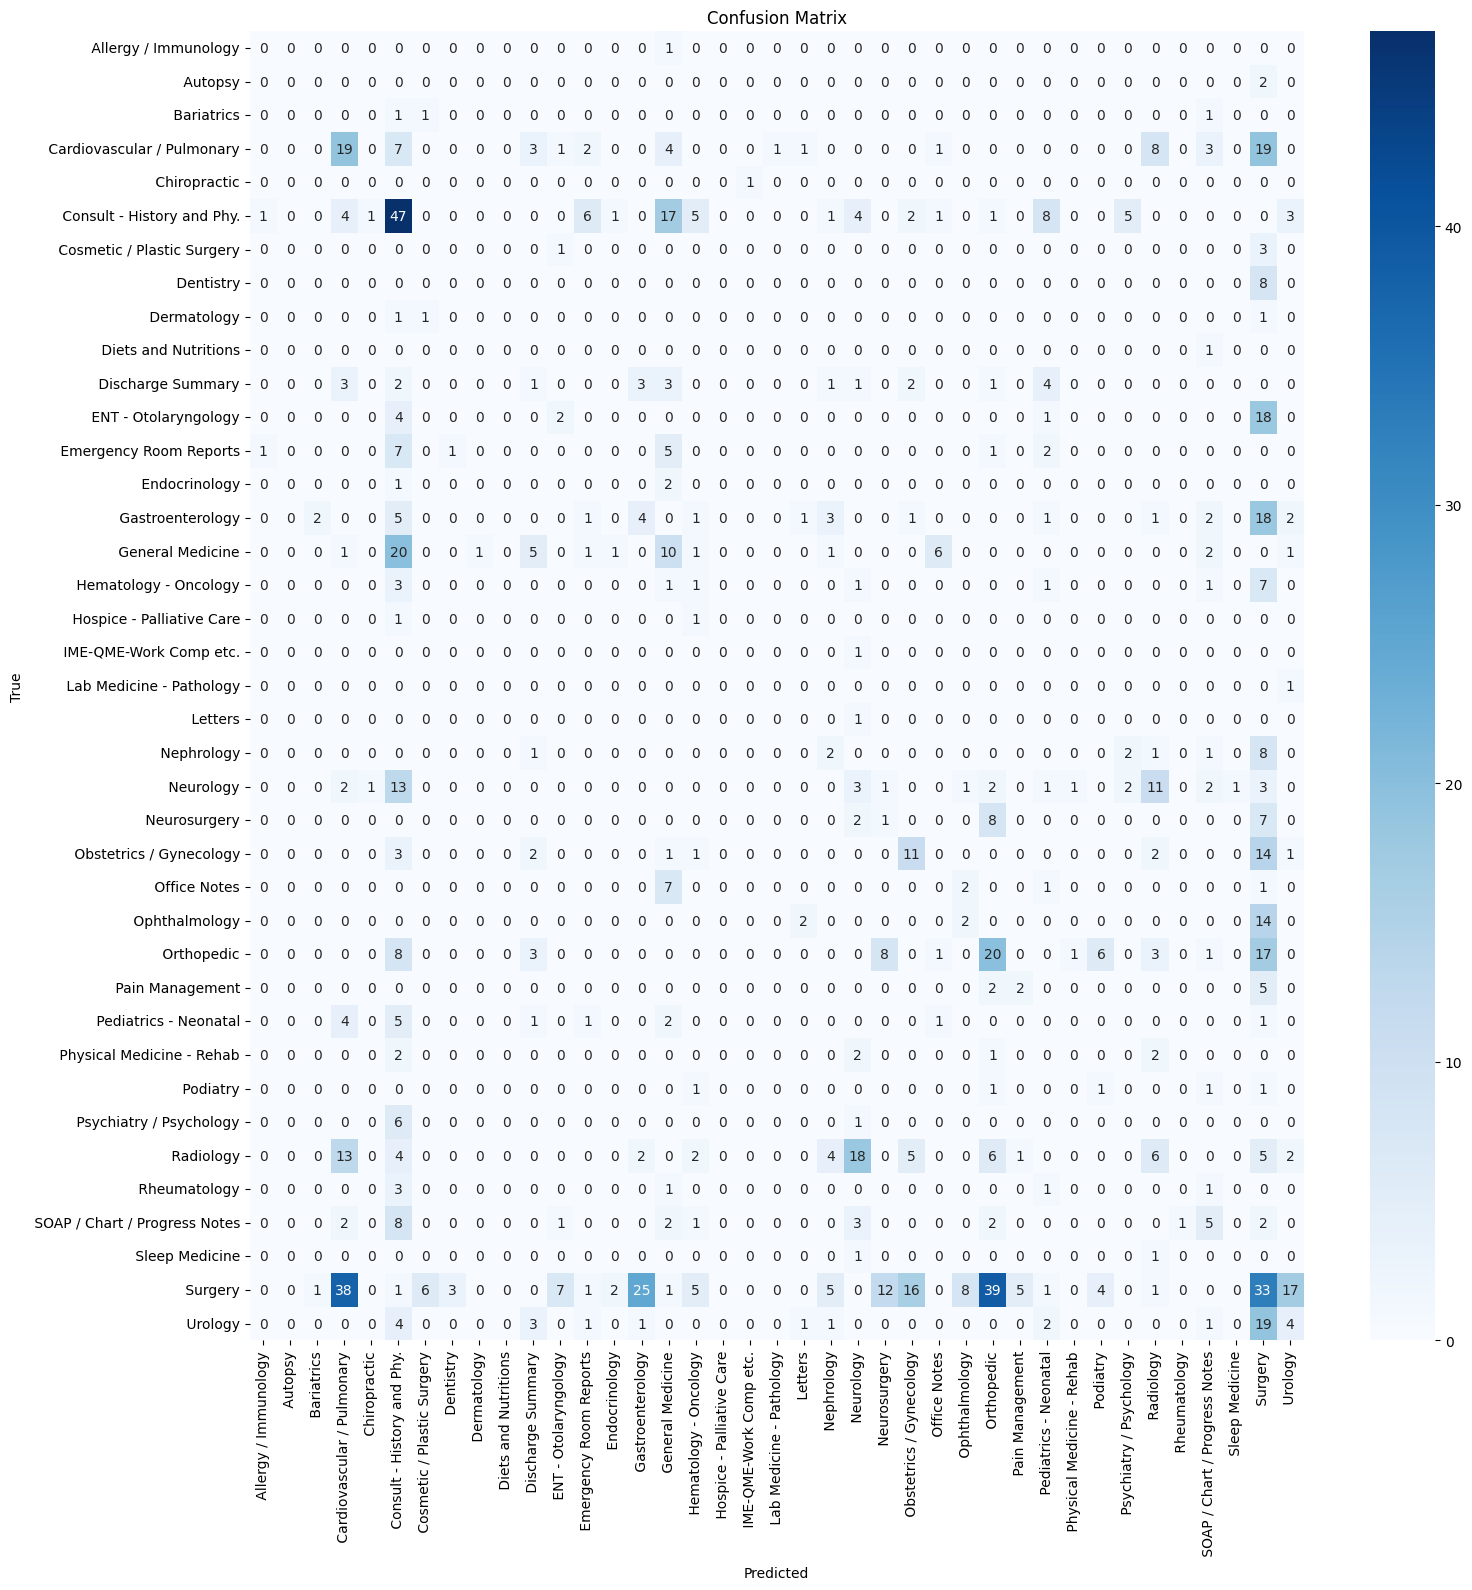


---- Training without cleaned_description feature ----
Accuracy: 17.70%
F1-Score (Weighted): 0.17

Classification Report:
                                 precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         1
                       Autopsy       0.00      0.00      0.00         2
                    Bariatrics       0.00      0.00      0.00         3
    Cardiovascular / Pulmonary       0.22      0.26      0.24        69
                  Chiropractic       0.00      0.00      0.00         1
    Consult - History and Phy.       0.31      0.46      0.37       107
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         4
                     Dentistry       0.00      0.00      0.00         8
                   Dermatology       0.00      0.00      0.00         3
          Diets and Nutritions       0.00      0.00      0.00         1
             Discharge Summary       0.05      0.05      0.05        21
          E

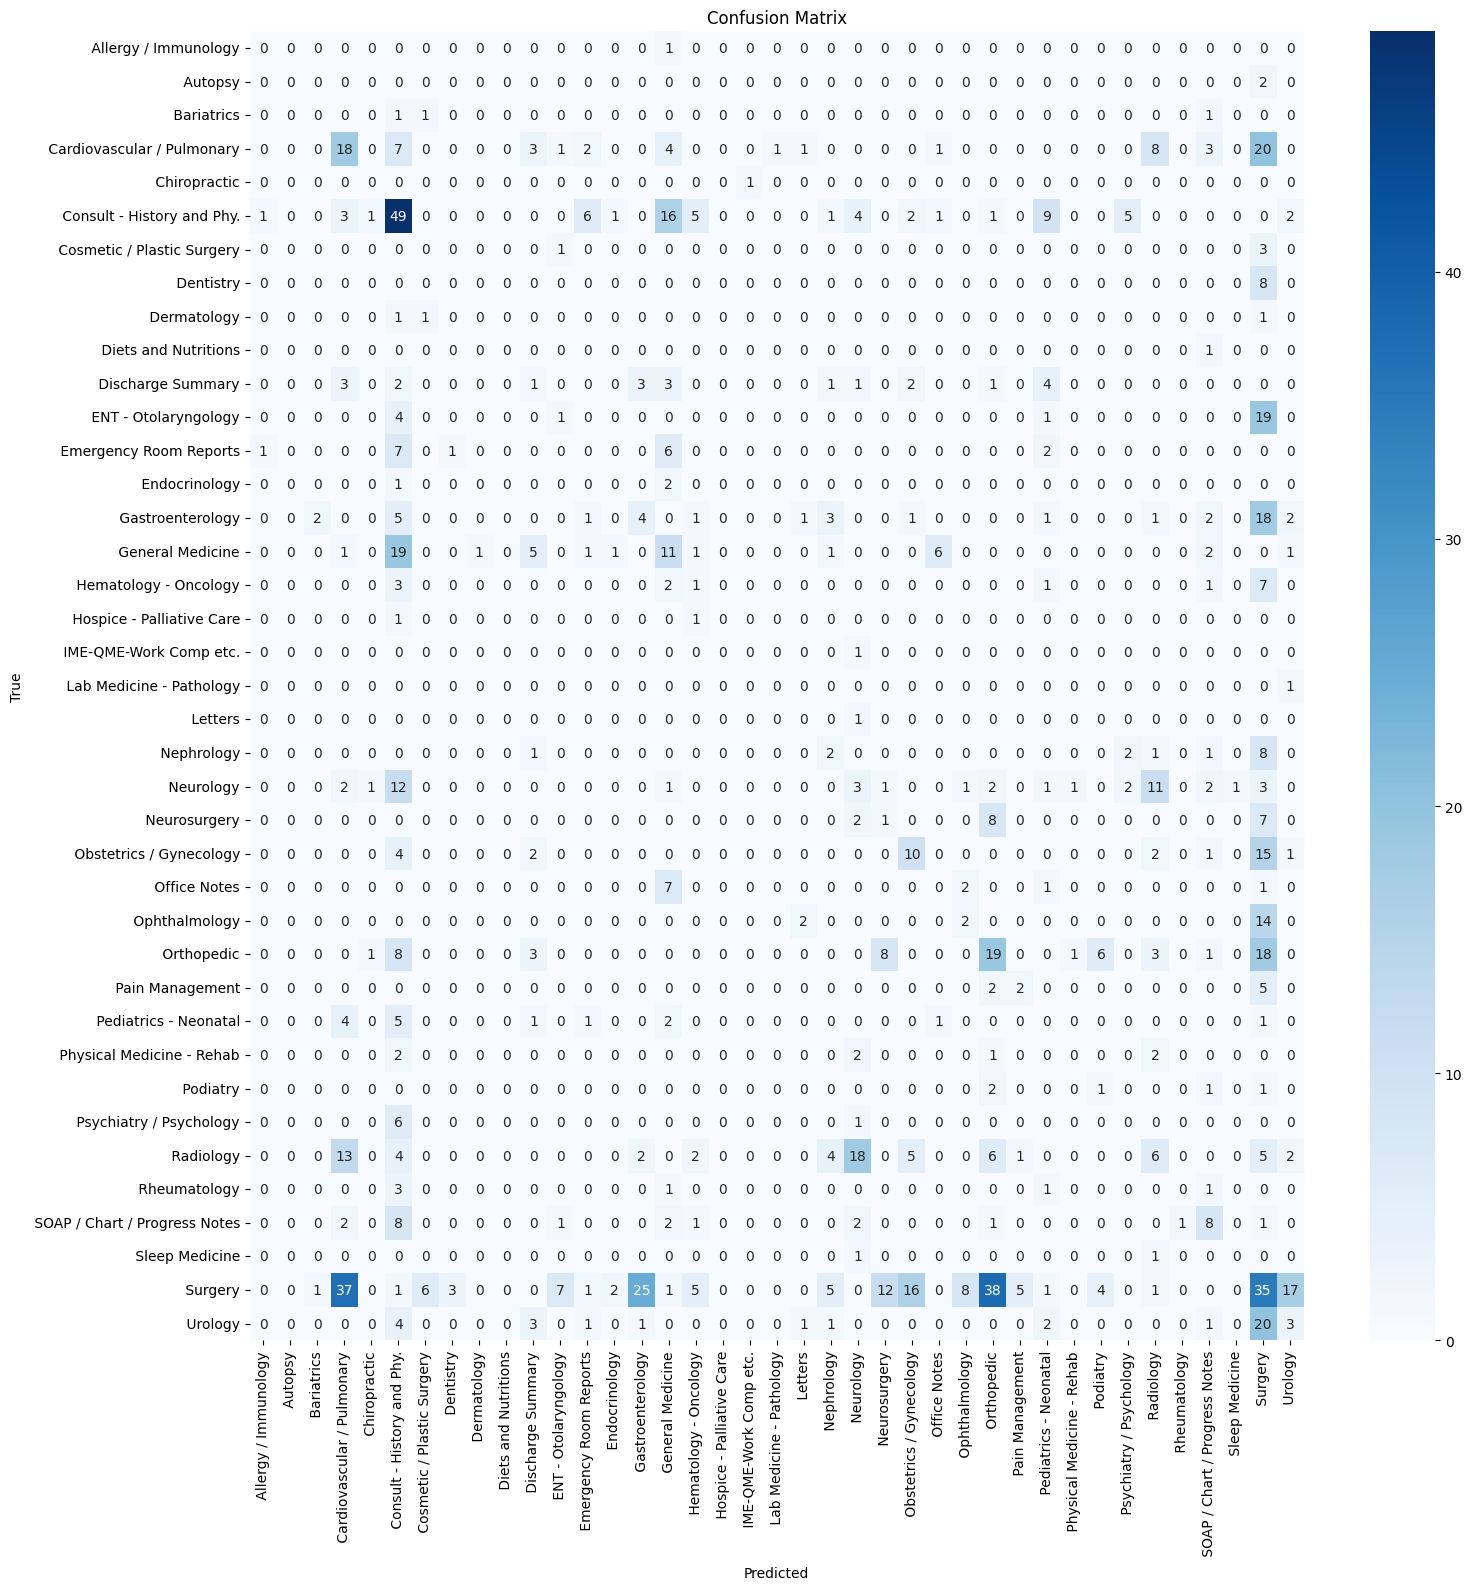


---- Training without cleaned_sample_name feature ----
Accuracy: 17.60%
F1-Score (Weighted): 0.17

Classification Report:
                                 precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         1
                       Autopsy       0.00      0.00      0.00         2
                    Bariatrics       0.00      0.00      0.00         3
    Cardiovascular / Pulmonary       0.22      0.26      0.24        69
                  Chiropractic       0.00      0.00      0.00         1
    Consult - History and Phy.       0.29      0.45      0.36       107
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         4
                     Dentistry       0.00      0.00      0.00         8
                   Dermatology       0.00      0.00      0.00         3
          Diets and Nutritions       0.00      0.00      0.00         1
             Discharge Summary       0.00      0.00      0.00        21
          E

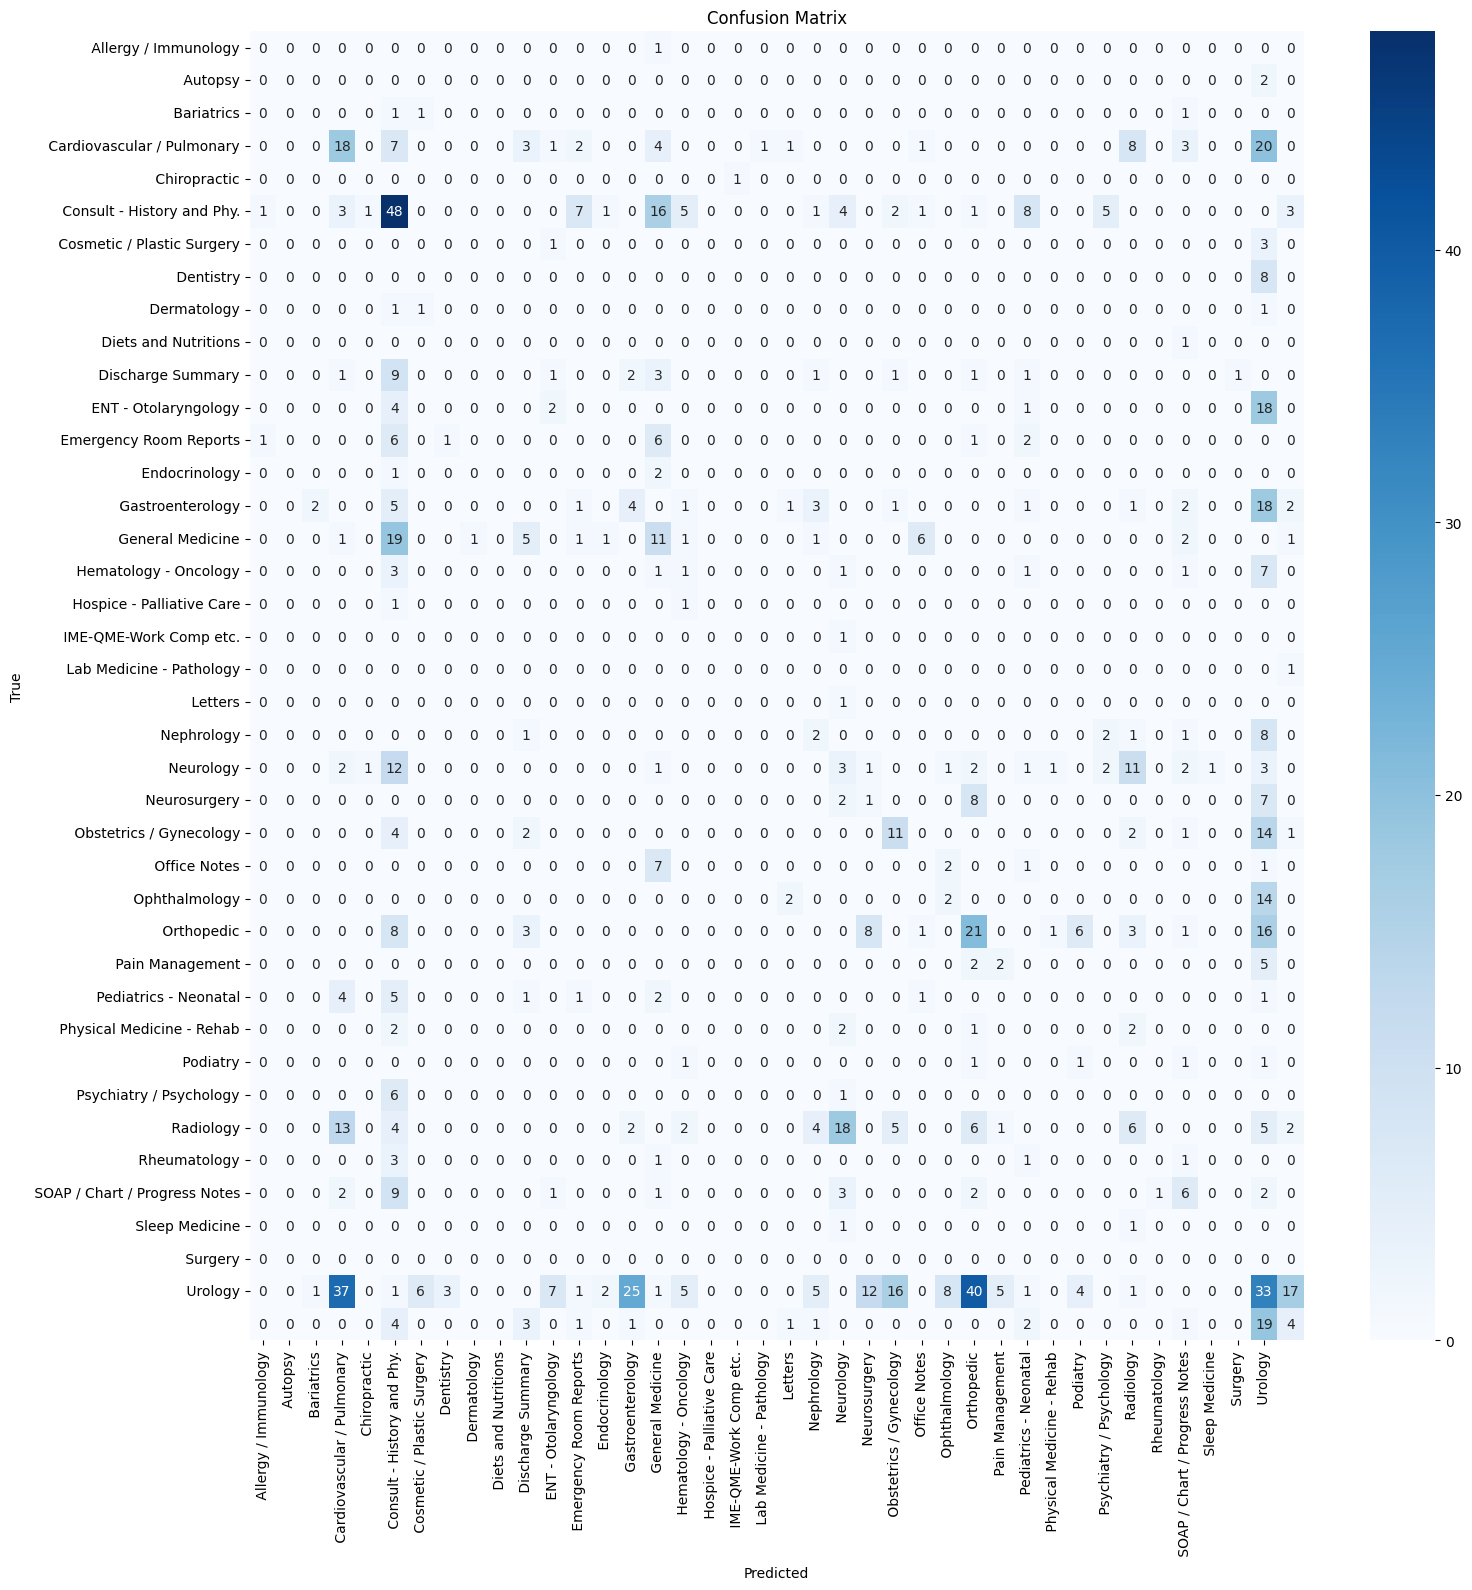


---- Training without cleaned_keywords feature ----
Accuracy: 11.20%
F1-Score (Weighted): 0.11

Classification Report:
                                 precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         1
                       Autopsy       0.00      0.00      0.00         2
                    Bariatrics       0.00      0.00      0.00         3
    Cardiovascular / Pulmonary       0.19      0.22      0.20        69
                  Chiropractic       0.00      0.00      0.00         1
    Consult - History and Phy.       0.13      0.14      0.14       107
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         4
                     Dentistry       0.00      0.00      0.00         8
                   Dermatology       0.00      0.00      0.00         3
          Diets and Nutritions       0.00      0.00      0.00         1
             Discharge Summary       0.00      0.00      0.00        21
          ENT 

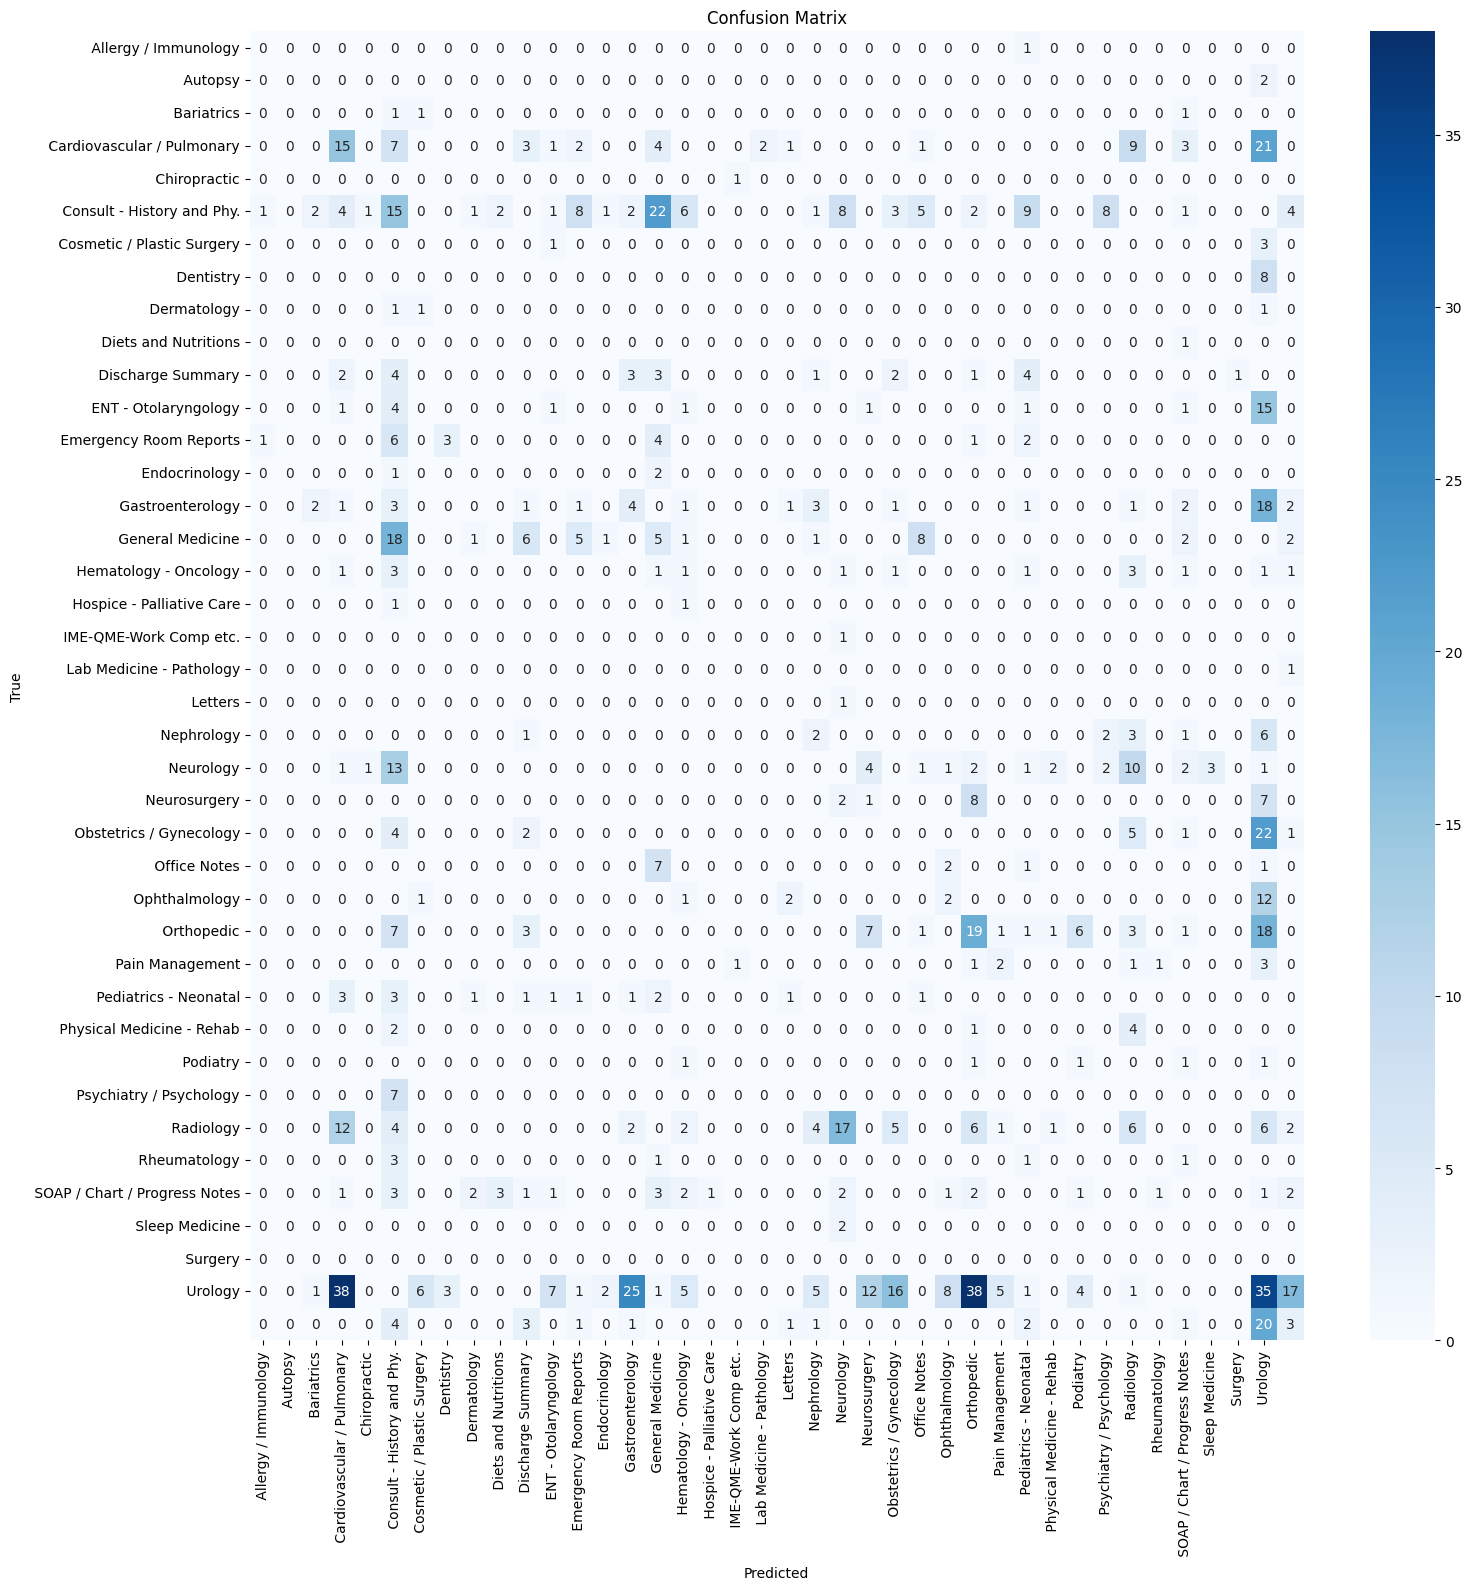


---- Training without cleaned_transcription feature ----
Accuracy: 27.70%
F1-Score (Weighted): 0.27

Classification Report:
                                 precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         1
                       Autopsy       1.00      0.50      0.67         2
                    Bariatrics       0.20      0.33      0.25         3
    Cardiovascular / Pulmonary       0.30      0.38      0.34        69
                  Chiropractic       0.00      0.00      0.00         1
    Consult - History and Phy.       0.21      0.19      0.20       107
    Cosmetic / Plastic Surgery       0.09      0.25      0.13         4
                     Dentistry       0.00      0.00      0.00         8
                   Dermatology       0.00      0.00      0.00         3
          Diets and Nutritions       0.00      0.00      0.00         1
             Discharge Summary       0.09      0.10      0.09        21
         

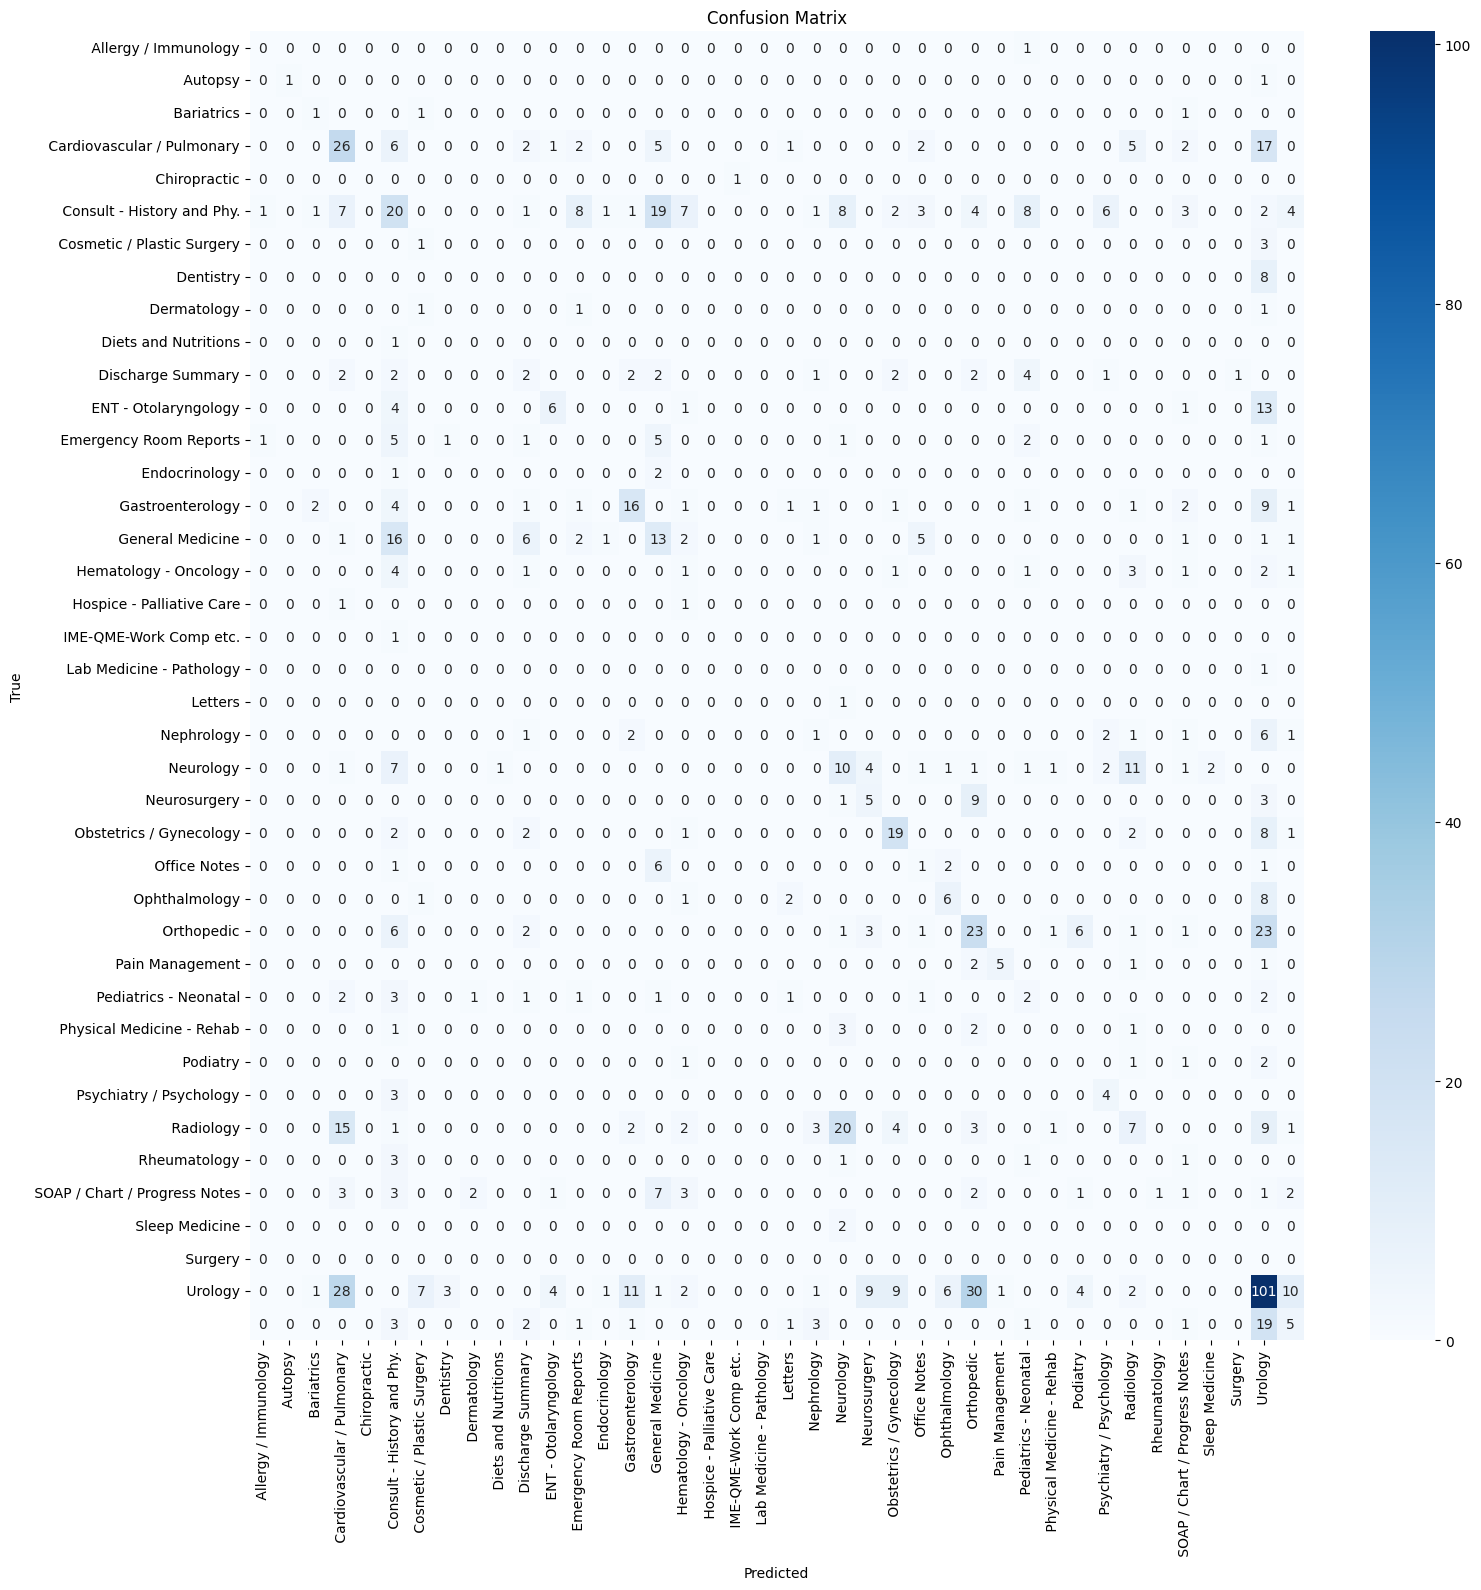


Ablation Study Results:
                       accuracy        f1
cleaned_description       0.177  0.168040
cleaned_sample_name       0.176  0.166748
cleaned_keywords          0.112  0.111906
cleaned_transcription     0.277  0.273869


In [3]:
import os
import numpy as np  
import pandas as pd 
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import re, string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Ensure nltk is installed and download stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Use the stopwords
stop_words = set(stopwords.words('english'))

# EDA
data = pd.read_csv('/kaggle/input/medicaltranscriptions/mtsamples.csv')
print(data.columns)

data.drop('Unnamed: 0', axis=1, inplace=True)

# Preprocessing function
def Preprocessing(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'\([^)]*\)', '', text)
    text = re.sub('"', '', text) 
    text = re.sub(r"'s\b", "", text)
    text = re.sub("[^a-zA-Z]", " ", text) 
    tokens = [w for w in text.split() if not w in stop_words]
    long_words = [i for i in tokens if len(i) >= 3]
    return (" ".join(long_words)).strip()

# Apply preprocessing to all relevant columns
data['cleaned_description'] = data['description'].apply(Preprocessing)
data['cleaned_sample_name'] = data['sample_name'].apply(Preprocessing)
data['cleaned_keywords'] = data['keywords'].apply(Preprocessing)
data['cleaned_transcription'] = data['transcription'].apply(Preprocessing)

# Combine all relevant text columns into one combined feature set
data['combined_text'] = data['cleaned_description'] + ' ' + data['cleaned_sample_name'] + ' ' + data['cleaned_keywords'] + ' ' + data['cleaned_transcription']

# Feature vectors and target vector
combined_texts = data['combined_text'].values
Y = data['medical_specialty'].values

# Function to create document-term matrix (TF-IDF)
def create_vec(strings):
    tf = TfidfVectorizer(max_features=6000, ngram_range=(1,3), min_df=5, max_df=0.9)
    tf.fit(strings)
    X = tf.transform(strings)
    return X

# Apply TF-IDF on combined text
vecs = create_vec(combined_texts)

# Splitting data into train:test by 80:20
x_train, x_val, y_train, y_val = train_test_split(vecs, Y, test_size=0.2, random_state=42)

x_train = x_train.toarray()
x_val = x_val.toarray()

# Function to train and evaluate model
def train_model(model, x_train, x_val, y_train, y_val):
    model.fit(x_train, y_train)
    prediction = model.predict(x_val)
    
    # Calculate Accuracy, F1-score, Classification Report, and Confusion Matrix
    accuracy = accuracy_score(y_val, prediction)
    f1 = f1_score(y_val, prediction, average='weighted')  # Use weighted average for multi-class classification
    
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'F1-Score (Weighted): {f1:.2f}')
    
    # Classification Report
    print("\nClassification Report:\n", classification_report(y_val, prediction))
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, prediction)
    plt.figure(figsize=(17, 17))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
    return model, accuracy, f1

# Initialize Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train and evaluate using Gaussian Naive Bayes (all features)
print("---- Training with all features ----")
gnb_model, accuracy_all, f1_all = train_model(gnb_model, x_train, x_val, y_train, y_val)

# Define the columns to be excluded for ablation
feature_columns = ['cleaned_description', 'cleaned_sample_name', 'cleaned_keywords', 'cleaned_transcription']
all_features = [data[col].values for col in feature_columns]

# Ablation study: exclude one feature at a time and re-train Naive Bayes
ablation_results = {}

for i, feature in enumerate(feature_columns):
    print(f"\n---- Training without {feature} feature ----")
    # Exclude the current feature
    remaining_features = [data[col].values for j, col in enumerate(feature_columns) if j != i]
    # Combine the remaining features into a single array
    combined_remaining_features = np.column_stack(remaining_features)
    
    # Apply TF-IDF on the remaining combined text
    vecs_ablation = create_vec([" ".join(feat) for feat in combined_remaining_features])
    
    # Split the data into train and test
    x_train_ablation, x_val_ablation, y_train, y_val = train_test_split(vecs_ablation, Y, test_size=0.2, random_state=42)
    
    x_train_ablation = x_train_ablation.toarray()
    x_val_ablation = x_val_ablation.toarray()

    # Train and evaluate model on the remaining features
    gnb_model, accuracy, f1 = train_model(gnb_model, x_train_ablation, x_val_ablation, y_train, y_val)
    
    ablation_results[feature] = {'accuracy': accuracy, 'f1': f1}

# Display ablation results
ablation_results_df = pd.DataFrame(ablation_results).T
print("\nAblation Study Results:")
print(ablation_results_df)

---- Training with all features ----
Accuracy: 37.50%
F1-Score (Weighted): 0.34

Classification Report:
                                 precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         1
                       Autopsy       0.00      0.00      0.00         2
                    Bariatrics       0.00      0.00      0.00         3
    Cardiovascular / Pulmonary       0.39      0.42      0.41        69
                  Chiropractic       0.00      0.00      0.00         1
    Consult - History and Phy.       0.36      0.67      0.47       107
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         4
                     Dentistry       0.00      0.00      0.00         8
                   Dermatology       0.00      0.00      0.00         3
          Diets and Nutritions       0.00      0.00      0.00         1
             Discharge Summary       0.48      0.67      0.56        21
          ENT - Otolaryngology

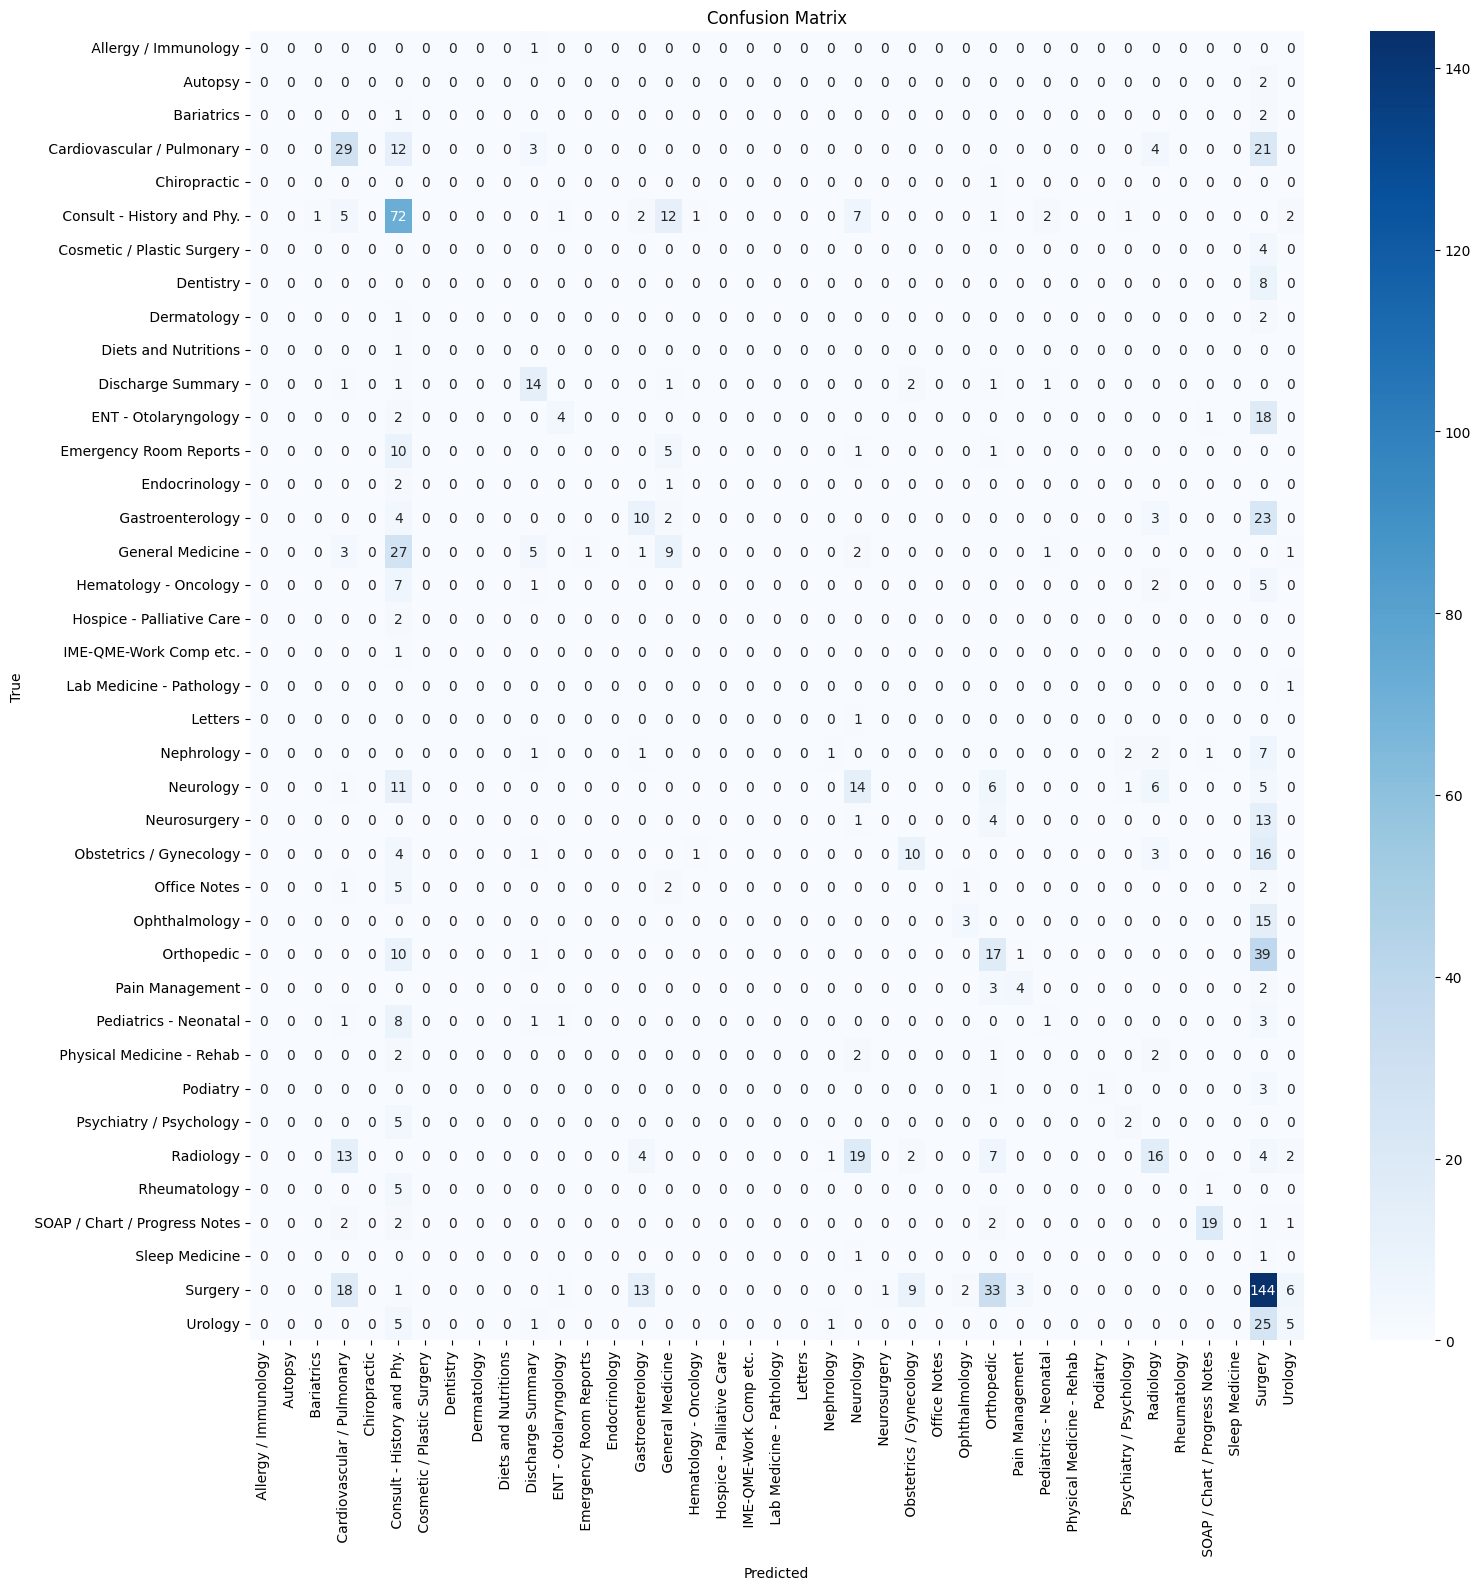


---- Training without cleaned_description feature ----
Accuracy: 39.10%
F1-Score (Weighted): 0.35

Classification Report:
                                 precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         1
                       Autopsy       0.00      0.00      0.00         2
                    Bariatrics       0.00      0.00      0.00         3
    Cardiovascular / Pulmonary       0.45      0.46      0.46        69
                  Chiropractic       0.00      0.00      0.00         1
    Consult - History and Phy.       0.36      0.69      0.48       107
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         4
                     Dentistry       0.00      0.00      0.00         8
                   Dermatology       0.00      0.00      0.00         3
          Diets and Nutritions       0.00      0.00      0.00         1
             Discharge Summary       0.52      0.67      0.58        21
          E

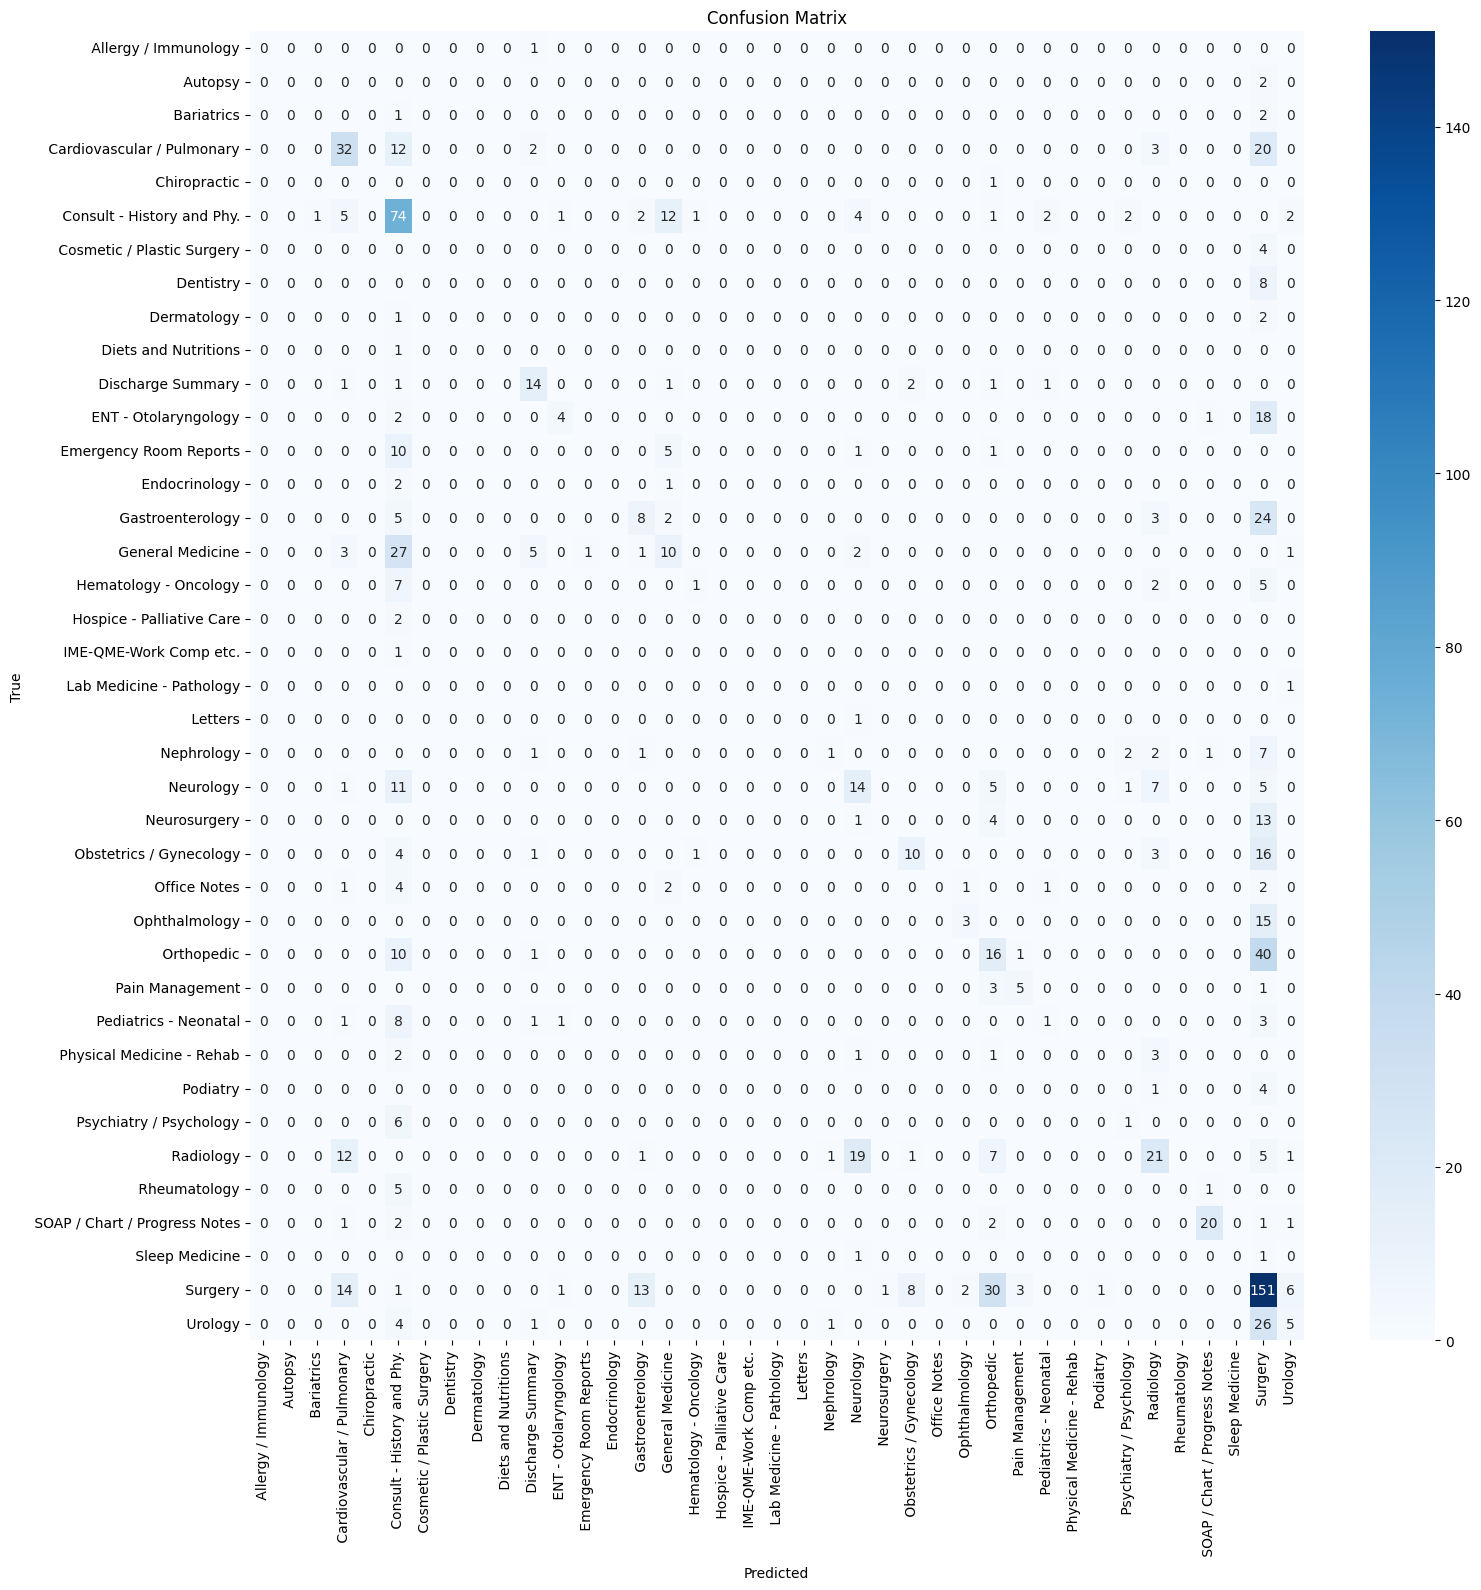


---- Training without cleaned_sample_name feature ----
Accuracy: 36.80%
F1-Score (Weighted): 0.33

Classification Report:
                                 precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         1
                       Autopsy       0.00      0.00      0.00         2
                    Bariatrics       0.00      0.00      0.00         3
    Cardiovascular / Pulmonary       0.39      0.43      0.41        69
                  Chiropractic       0.00      0.00      0.00         1
    Consult - History and Phy.       0.34      0.64      0.45       107
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         4
                     Dentistry       0.00      0.00      0.00         8
                   Dermatology       0.00      0.00      0.00         3
          Diets and Nutritions       0.00      0.00      0.00         1
             Discharge Summary       0.44      0.52      0.48        21
          E

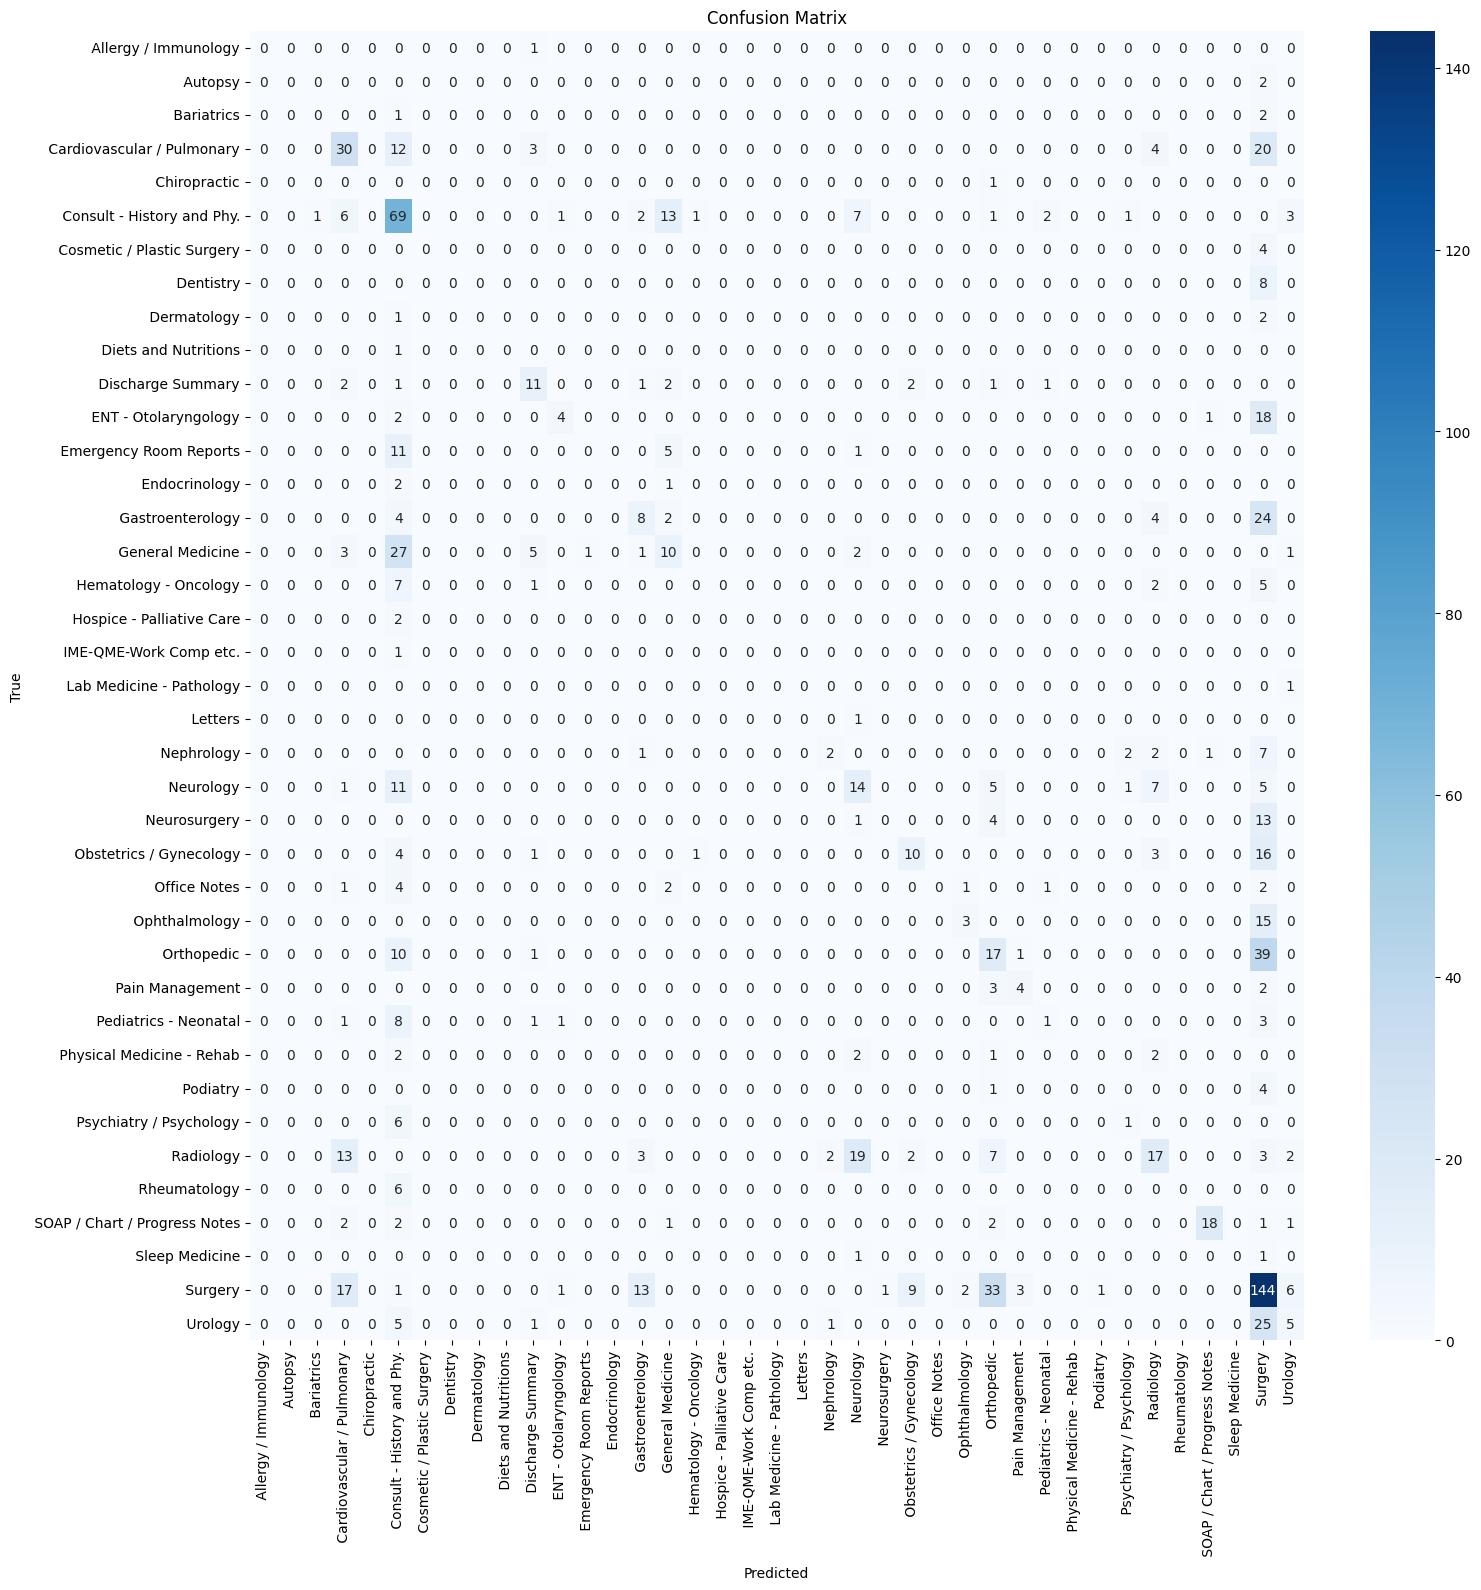


---- Training without cleaned_keywords feature ----
Accuracy: 27.80%
F1-Score (Weighted): 0.24

Classification Report:
                                 precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         1
                       Autopsy       0.00      0.00      0.00         2
                    Bariatrics       0.00      0.00      0.00         3
    Cardiovascular / Pulmonary       0.26      0.30      0.28        69
                  Chiropractic       0.00      0.00      0.00         1
    Consult - History and Phy.       0.28      0.53      0.37       107
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         4
                     Dentistry       0.00      0.00      0.00         8
                   Dermatology       0.00      0.00      0.00         3
          Diets and Nutritions       0.00      0.00      0.00         1
             Discharge Summary       0.32      0.52      0.40        21
          ENT 

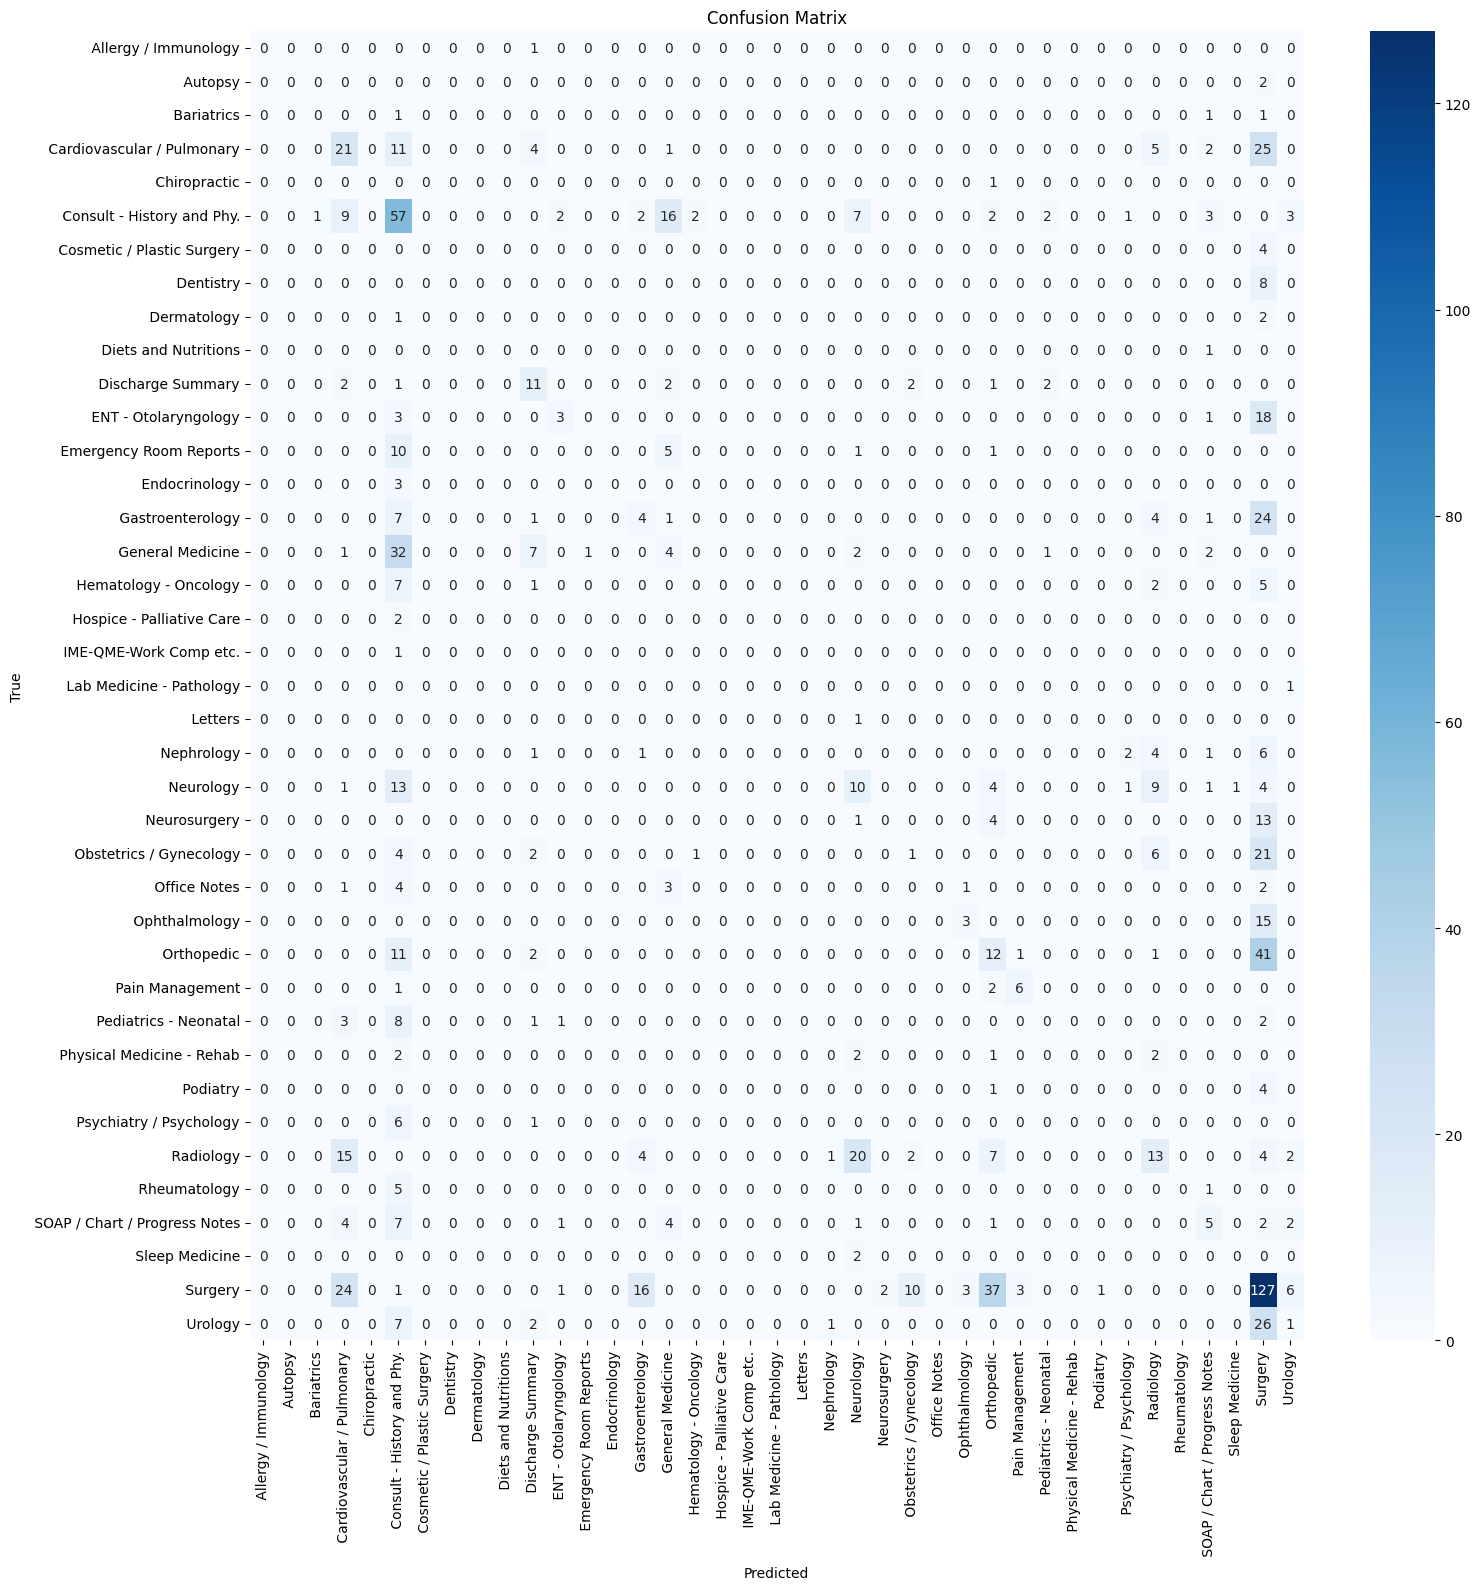


---- Training without cleaned_transcription feature ----
Accuracy: 56.90%
F1-Score (Weighted): 0.54

Classification Report:
                                 precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         1
                       Autopsy       1.00      0.50      0.67         2
                    Bariatrics       0.00      0.00      0.00         3
    Cardiovascular / Pulmonary       0.61      0.62      0.61        69
                  Chiropractic       0.00      0.00      0.00         1
    Consult - History and Phy.       0.46      0.66      0.54       107
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         4
                     Dentistry       0.00      0.00      0.00         8
                   Dermatology       0.00      0.00      0.00         3
          Diets and Nutritions       0.00      0.00      0.00         1
             Discharge Summary       0.63      0.81      0.71        21
         

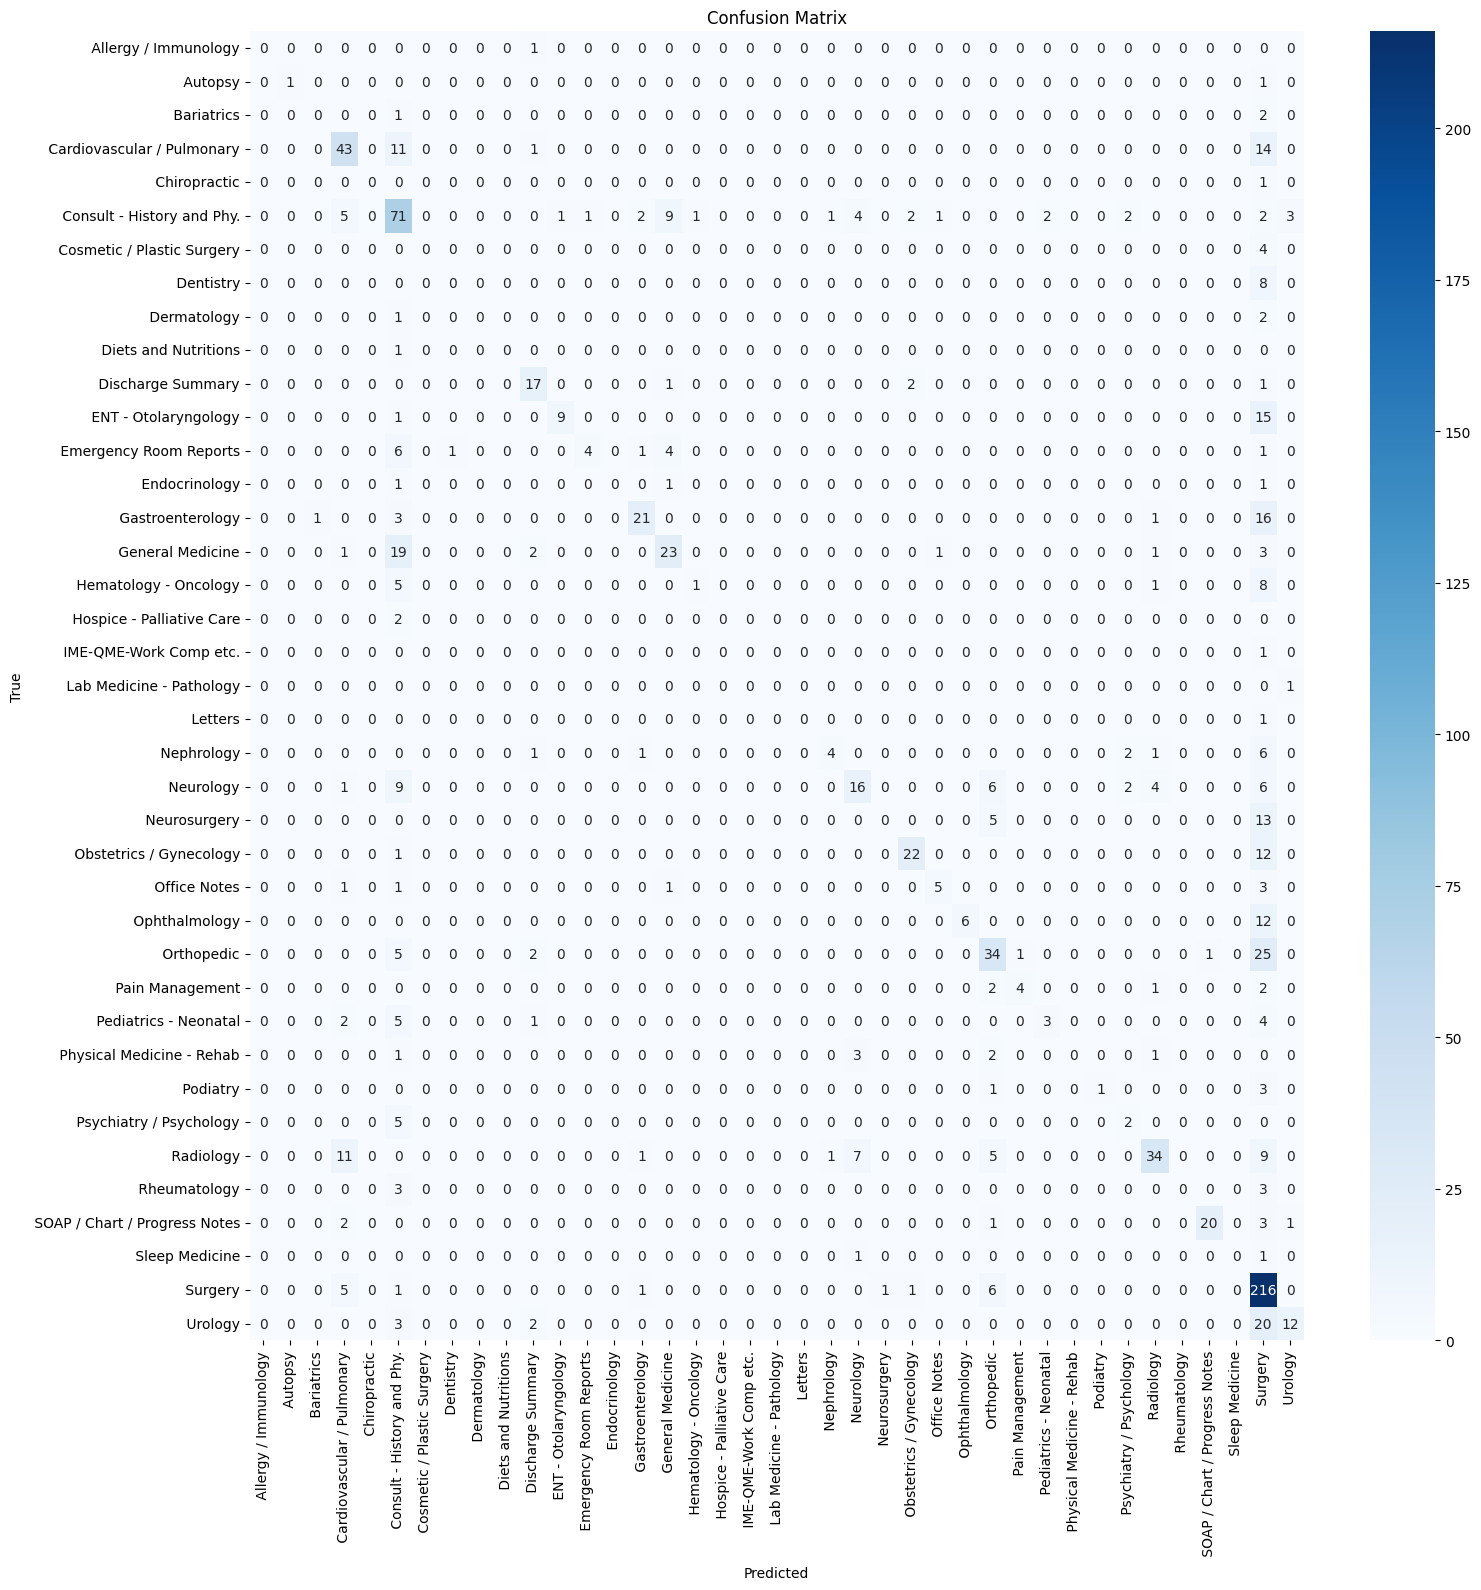


Ablation Study Results:
                       accuracy        f1
cleaned_description       0.391  0.349355
cleaned_sample_name       0.368  0.330077
cleaned_keywords          0.278  0.236207
cleaned_transcription     0.569  0.535517


In [5]:
import os
import numpy as np  
import pandas as pd 
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import re, string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression  # Replacing GaussianNB with LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Ensure nltk is installed and download stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Use the stopwords
stop_words = set(stopwords.words('english'))

# EDA
data = pd.read_csv('/kaggle/input/medicaltranscriptions/mtsamples.csv')
print(data.columns)

data.drop('Unnamed: 0', axis=1, inplace=True)

# Preprocessing function
def Preprocessing(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'\([^)]*\)', '', text)
    text = re.sub('"', '', text) 
    text = re.sub(r"'s\b", "", text)
    text = re.sub("[^a-zA-Z]", " ", text) 
    tokens = [w for w in text.split() if not w in stop_words]
    long_words = [i for i in tokens if len(i) >= 3]
    return (" ".join(long_words)).strip()

# Apply preprocessing to all relevant columns
data['cleaned_description'] = data['description'].apply(Preprocessing)
data['cleaned_sample_name'] = data['sample_name'].apply(Preprocessing)
data['cleaned_keywords'] = data['keywords'].apply(Preprocessing)
data['cleaned_transcription'] = data['transcription'].apply(Preprocessing)

# Combine all relevant text columns into one combined feature set
data['combined_text'] = data['cleaned_description'] + ' ' + data['cleaned_sample_name'] + ' ' + data['cleaned_keywords'] + ' ' + data['cleaned_transcription']

# Feature vectors and target vector
combined_texts = data['combined_text'].values
Y = data['medical_specialty'].values

# Function to create document-term matrix (TF-IDF)
def create_vec(strings):
    tf = TfidfVectorizer(max_features=6000, ngram_range=(1,3), min_df=5, max_df=0.9)
    tf.fit(strings)
    X = tf.transform(strings)
    return X

# Apply TF-IDF on combined text
vecs = create_vec(combined_texts)

# Splitting data into train:test by 80:20
x_train, x_val, y_train, y_val = train_test_split(vecs, Y, test_size=0.2, random_state=42)

x_train = x_train.toarray()
x_val = x_val.toarray()

# Function to train and evaluate model
def train_model(model, x_train, x_val, y_train, y_val):
    model.fit(x_train, y_train)
    prediction = model.predict(x_val)
    
    # Calculate Accuracy, F1-score, Classification Report, and Confusion Matrix
    accuracy = accuracy_score(y_val, prediction)
    f1 = f1_score(y_val, prediction, average='weighted')  # Use weighted average for multi-class classification
    
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'F1-Score (Weighted): {f1:.2f}')
    
    # Classification Report
    print("\nClassification Report:\n", classification_report(y_val, prediction))
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, prediction)
    plt.figure(figsize=(17, 17))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
    return model, accuracy, f1

# Initialize Logistic Regression model
lr_model = LogisticRegression()

# Train and evaluate using Logistic Regression (all features)
print("---- Training with all features ----")
lr_model, accuracy_all, f1_all = train_model(lr_model, x_train, x_val, y_train, y_val)

# Define the columns to be excluded for ablation
feature_columns = ['cleaned_description', 'cleaned_sample_name', 'cleaned_keywords', 'cleaned_transcription']
all_features = [data[col].values for col in feature_columns]

# Ablation study: exclude one feature at a time and re-train Logistic Regression
ablation_results = {}

for i, feature in enumerate(feature_columns):
    print(f"\n---- Training without {feature} feature ----")
    # Exclude the current feature
    remaining_features = [data[col].values for j, col in enumerate(feature_columns) if j != i]
    # Combine the remaining features into a single array
    combined_remaining_features = np.column_stack(remaining_features)
    
    # Apply TF-IDF on the remaining combined text
    vecs_ablation = create_vec([" ".join(feat) for feat in combined_remaining_features])
    
    # Split the data into train and test
    x_train_ablation, x_val_ablation, y_train, y_val = train_test_split(vecs_ablation, Y, test_size=0.2, random_state=42)
    
    x_train_ablation = x_train_ablation.toarray()
    x_val_ablation = x_val_ablation.toarray()

    # Train and evaluate model on the remaining features
    lr_model, accuracy, f1 = train_model(lr_model, x_train_ablation, x_val_ablation, y_train, y_val)
    
    ablation_results[feature] = {'accuracy': accuracy, 'f1': f1}

# Display ablation results
ablation_results_df = pd.DataFrame(ablation_results).T
print("\nAblation Study Results:")
print(ablation_results_df)